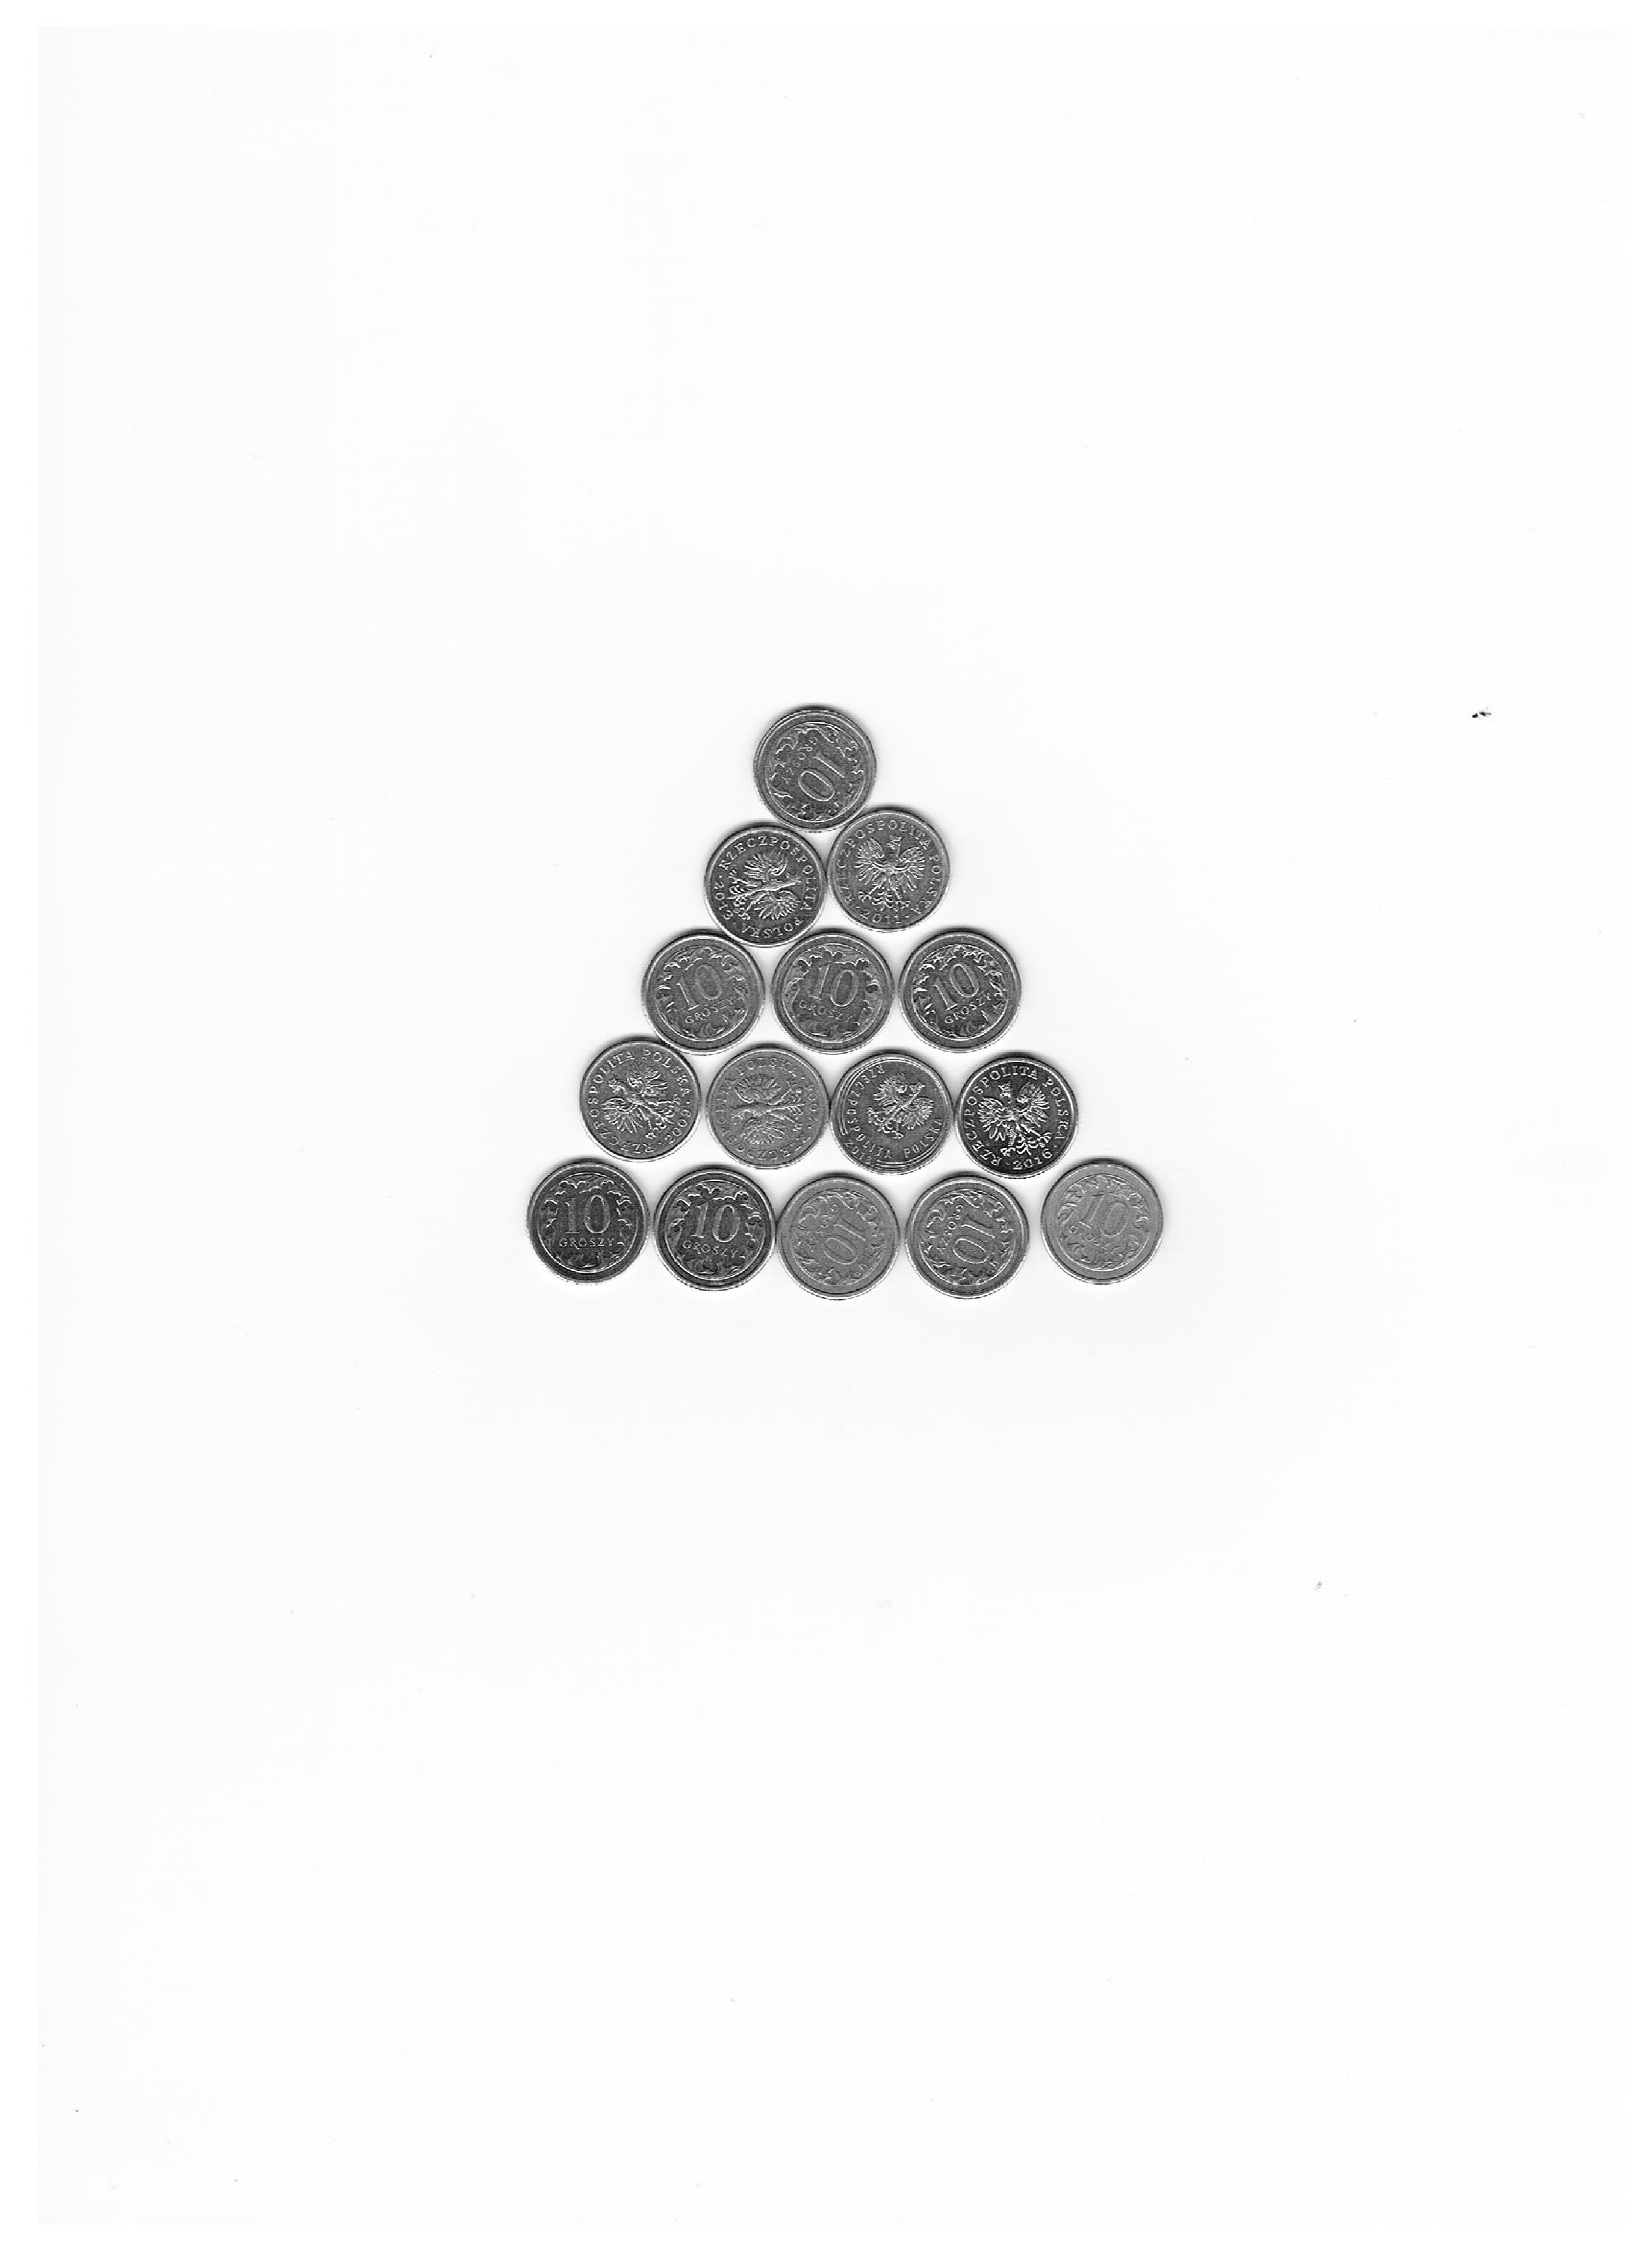

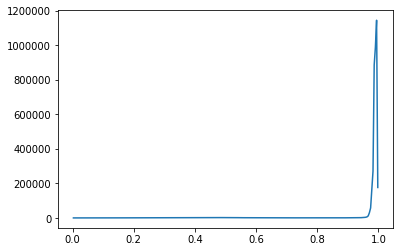

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, io, color, img_as_ubyte
from skimage.exposure import histogram

def showImage(image):
    plt.figure(figsize=(100,100))
    plt.imshow(image, cmap="gray")
    plt.axis('off')
    plt.show()

path = 'images/'

image = io.imread(path + '003.jpg')
gray_image = color.rgb2gray(image)


showImage(gray_image)



/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


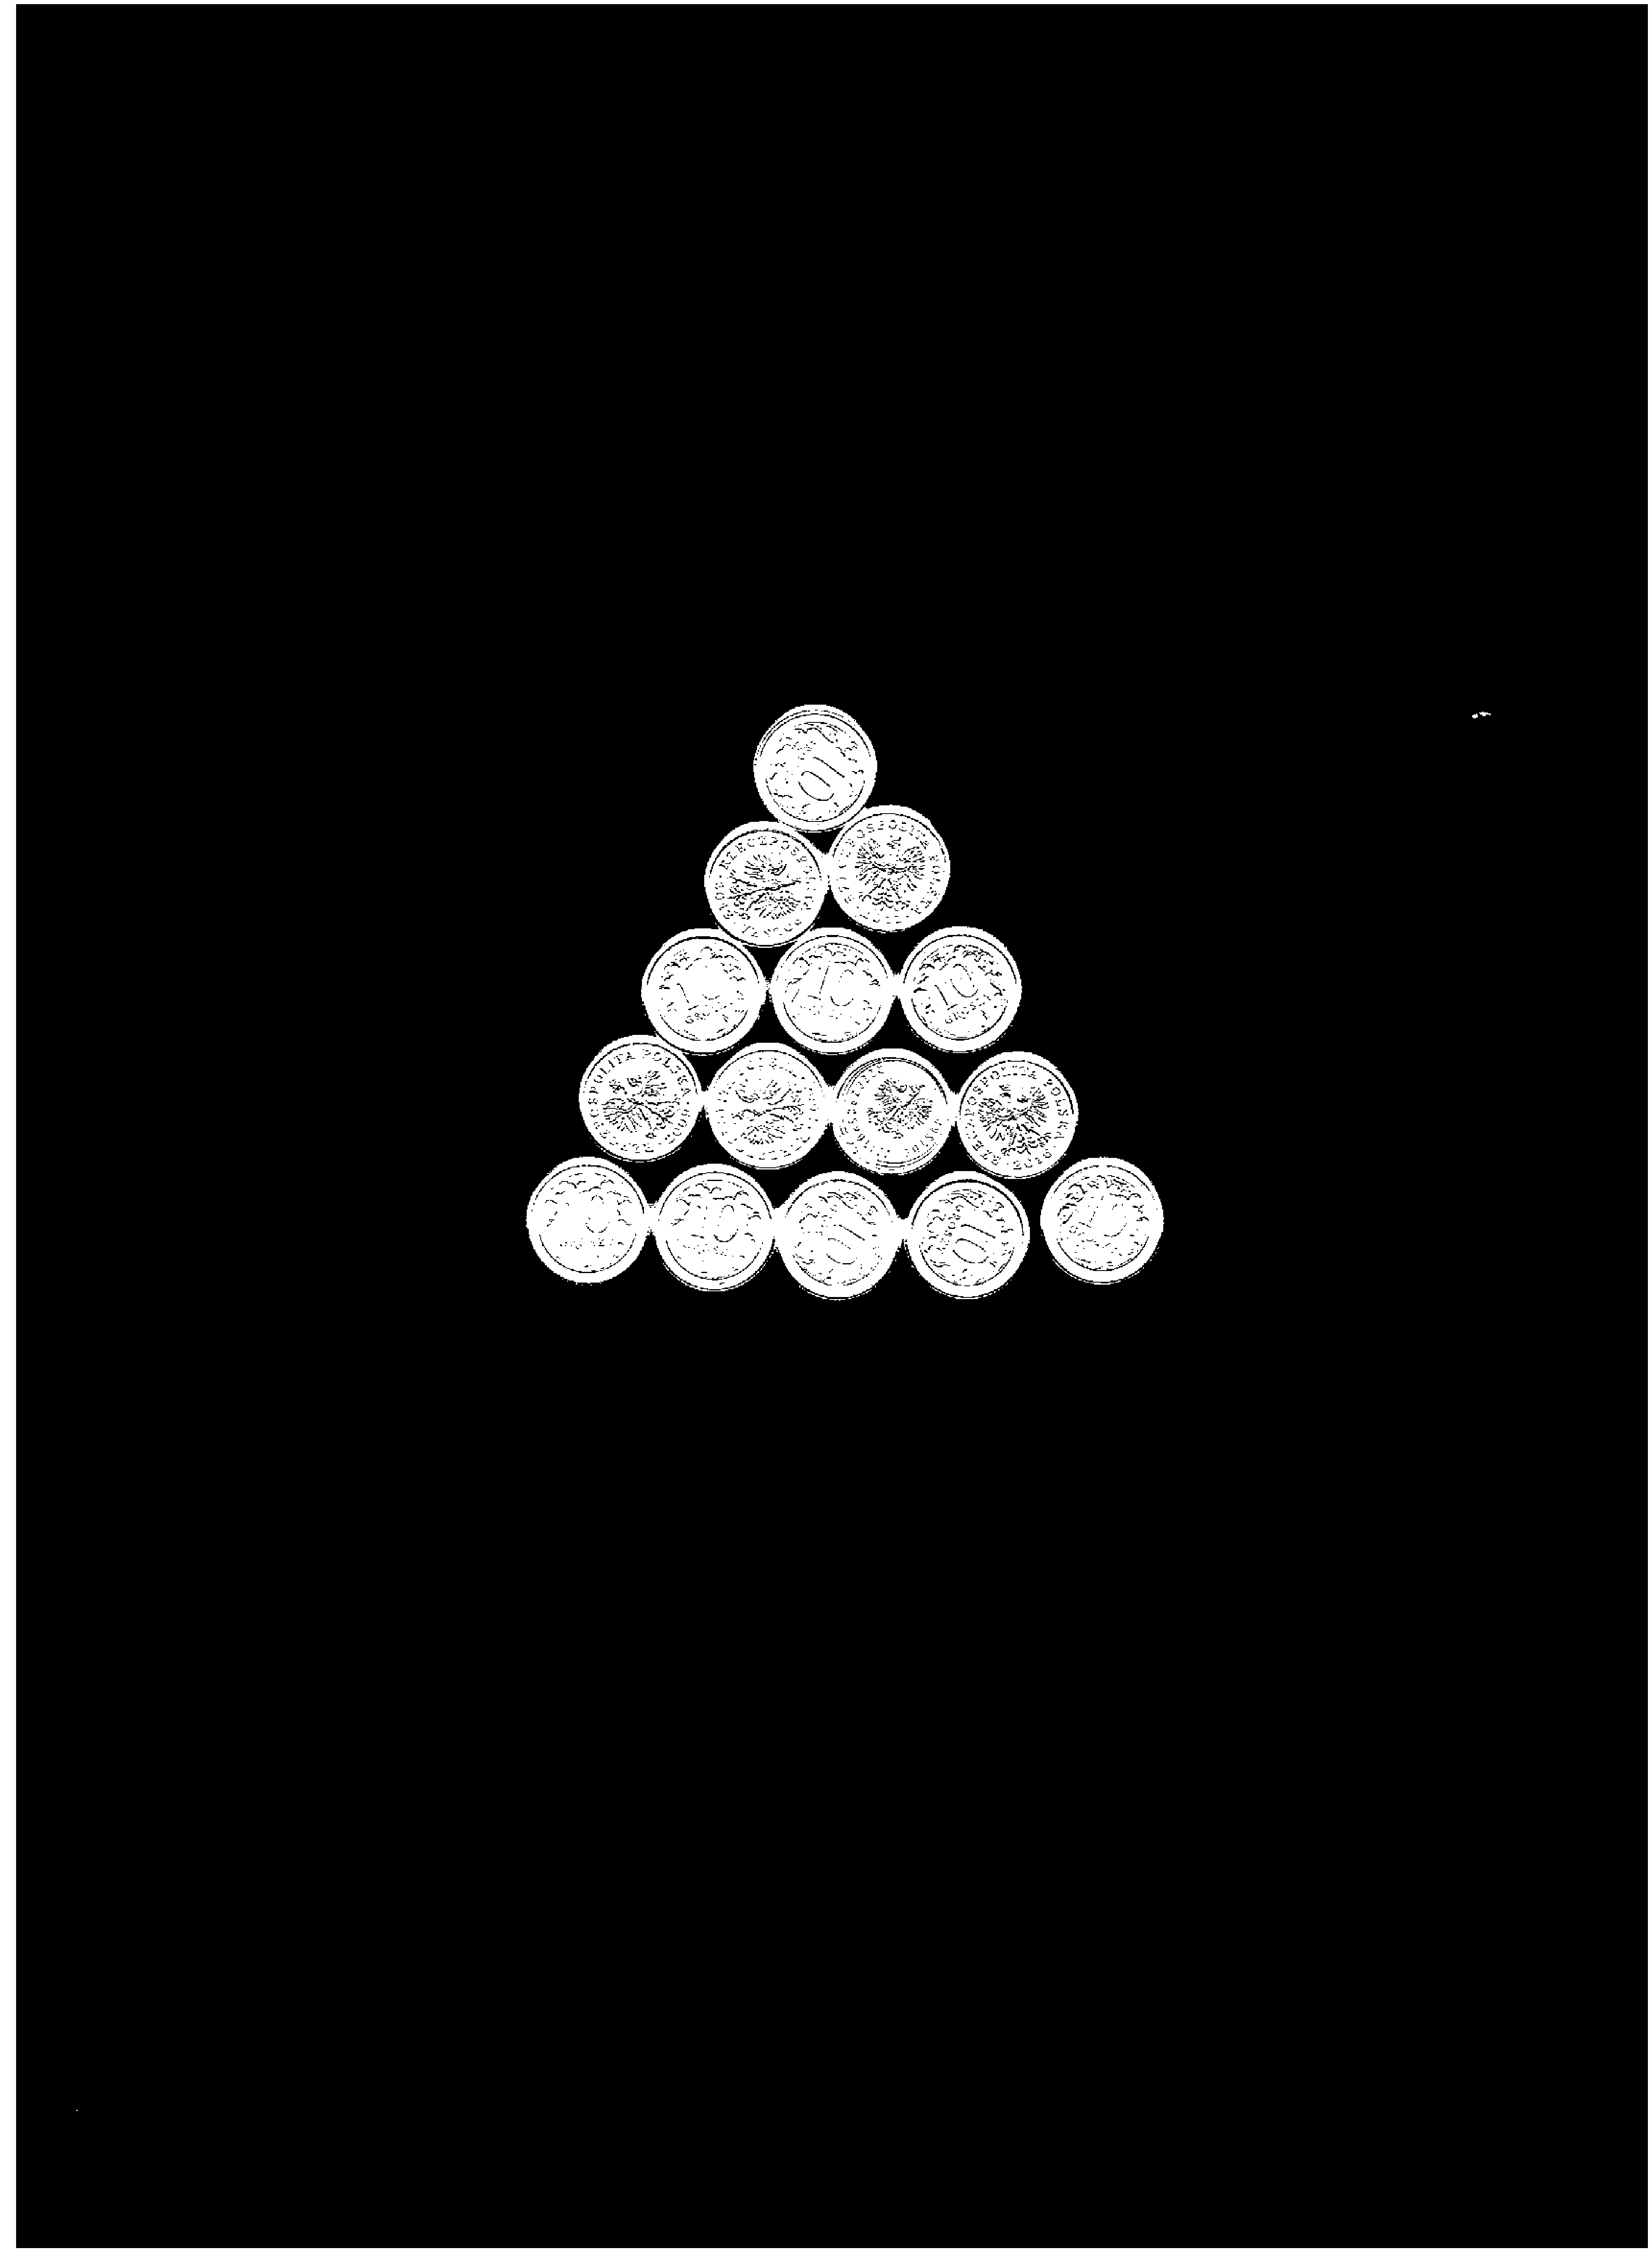

In [3]:
from skimage.filters import threshold_li

import cv2

byte_image = img_as_ubyte(gray_image)

th, image_byte = cv2.threshold(byte_image, 170, 255, cv2.THRESH_BINARY_INV)
showImage(image_byte)

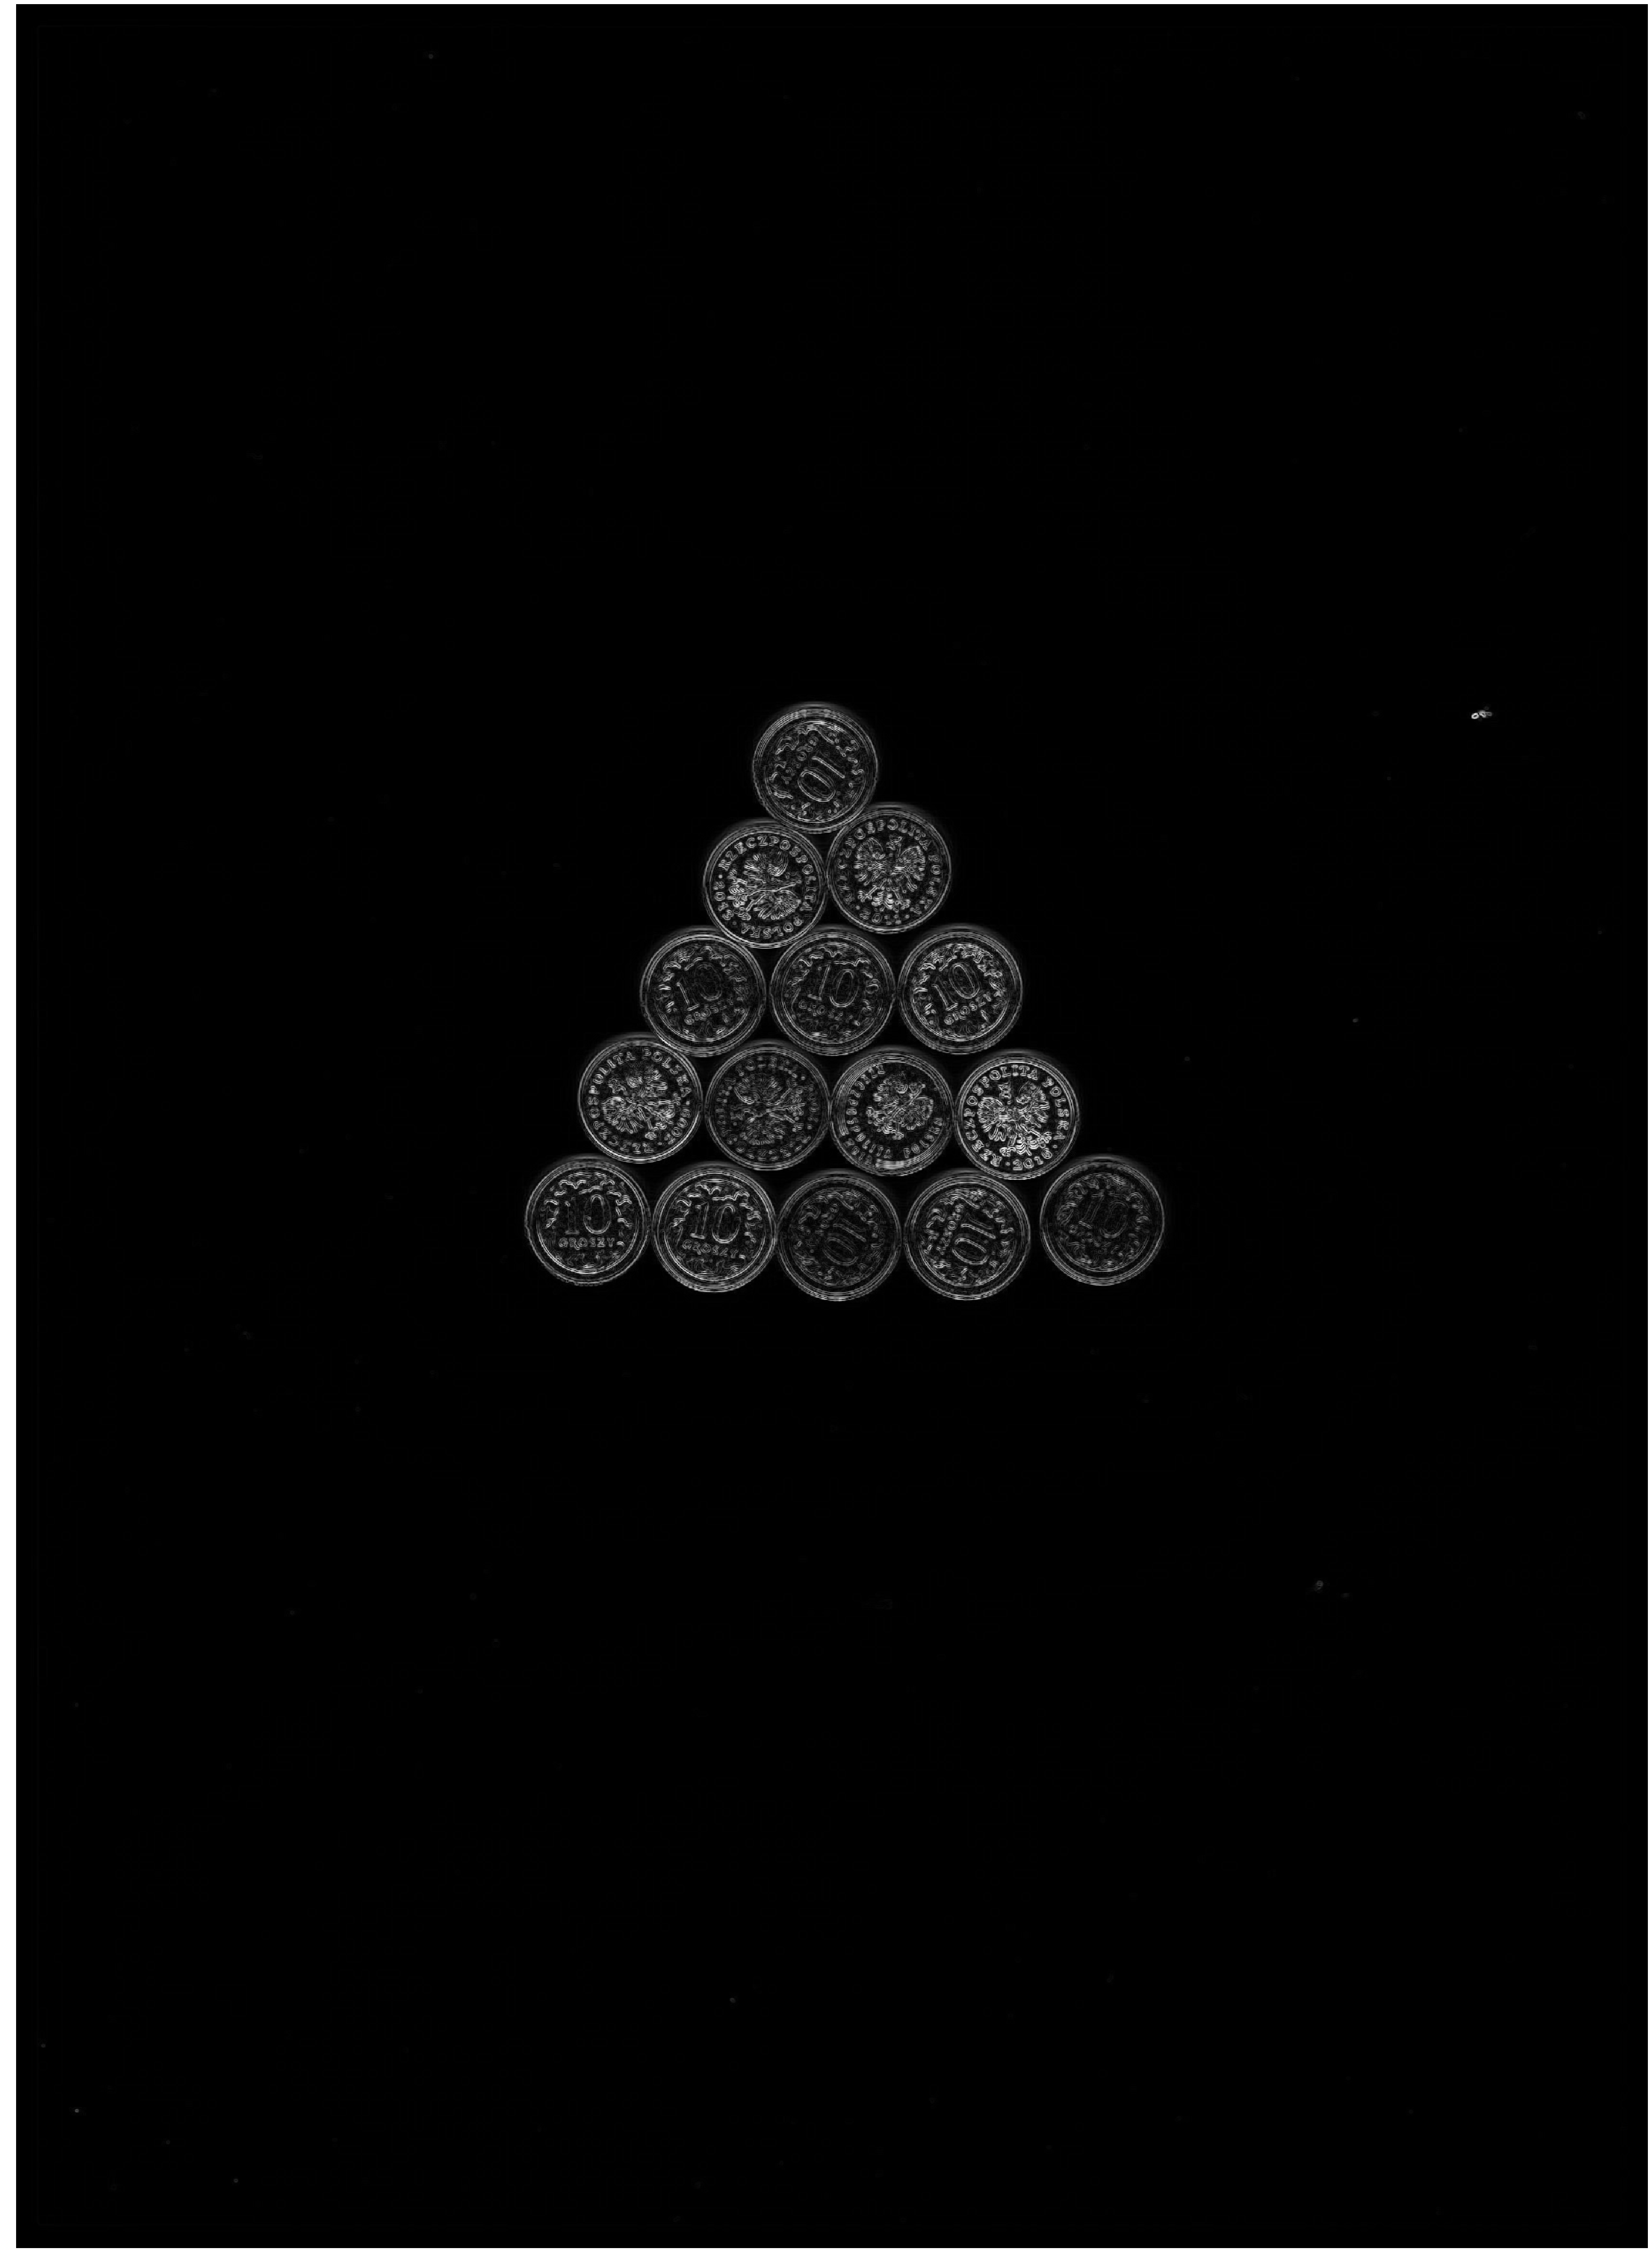

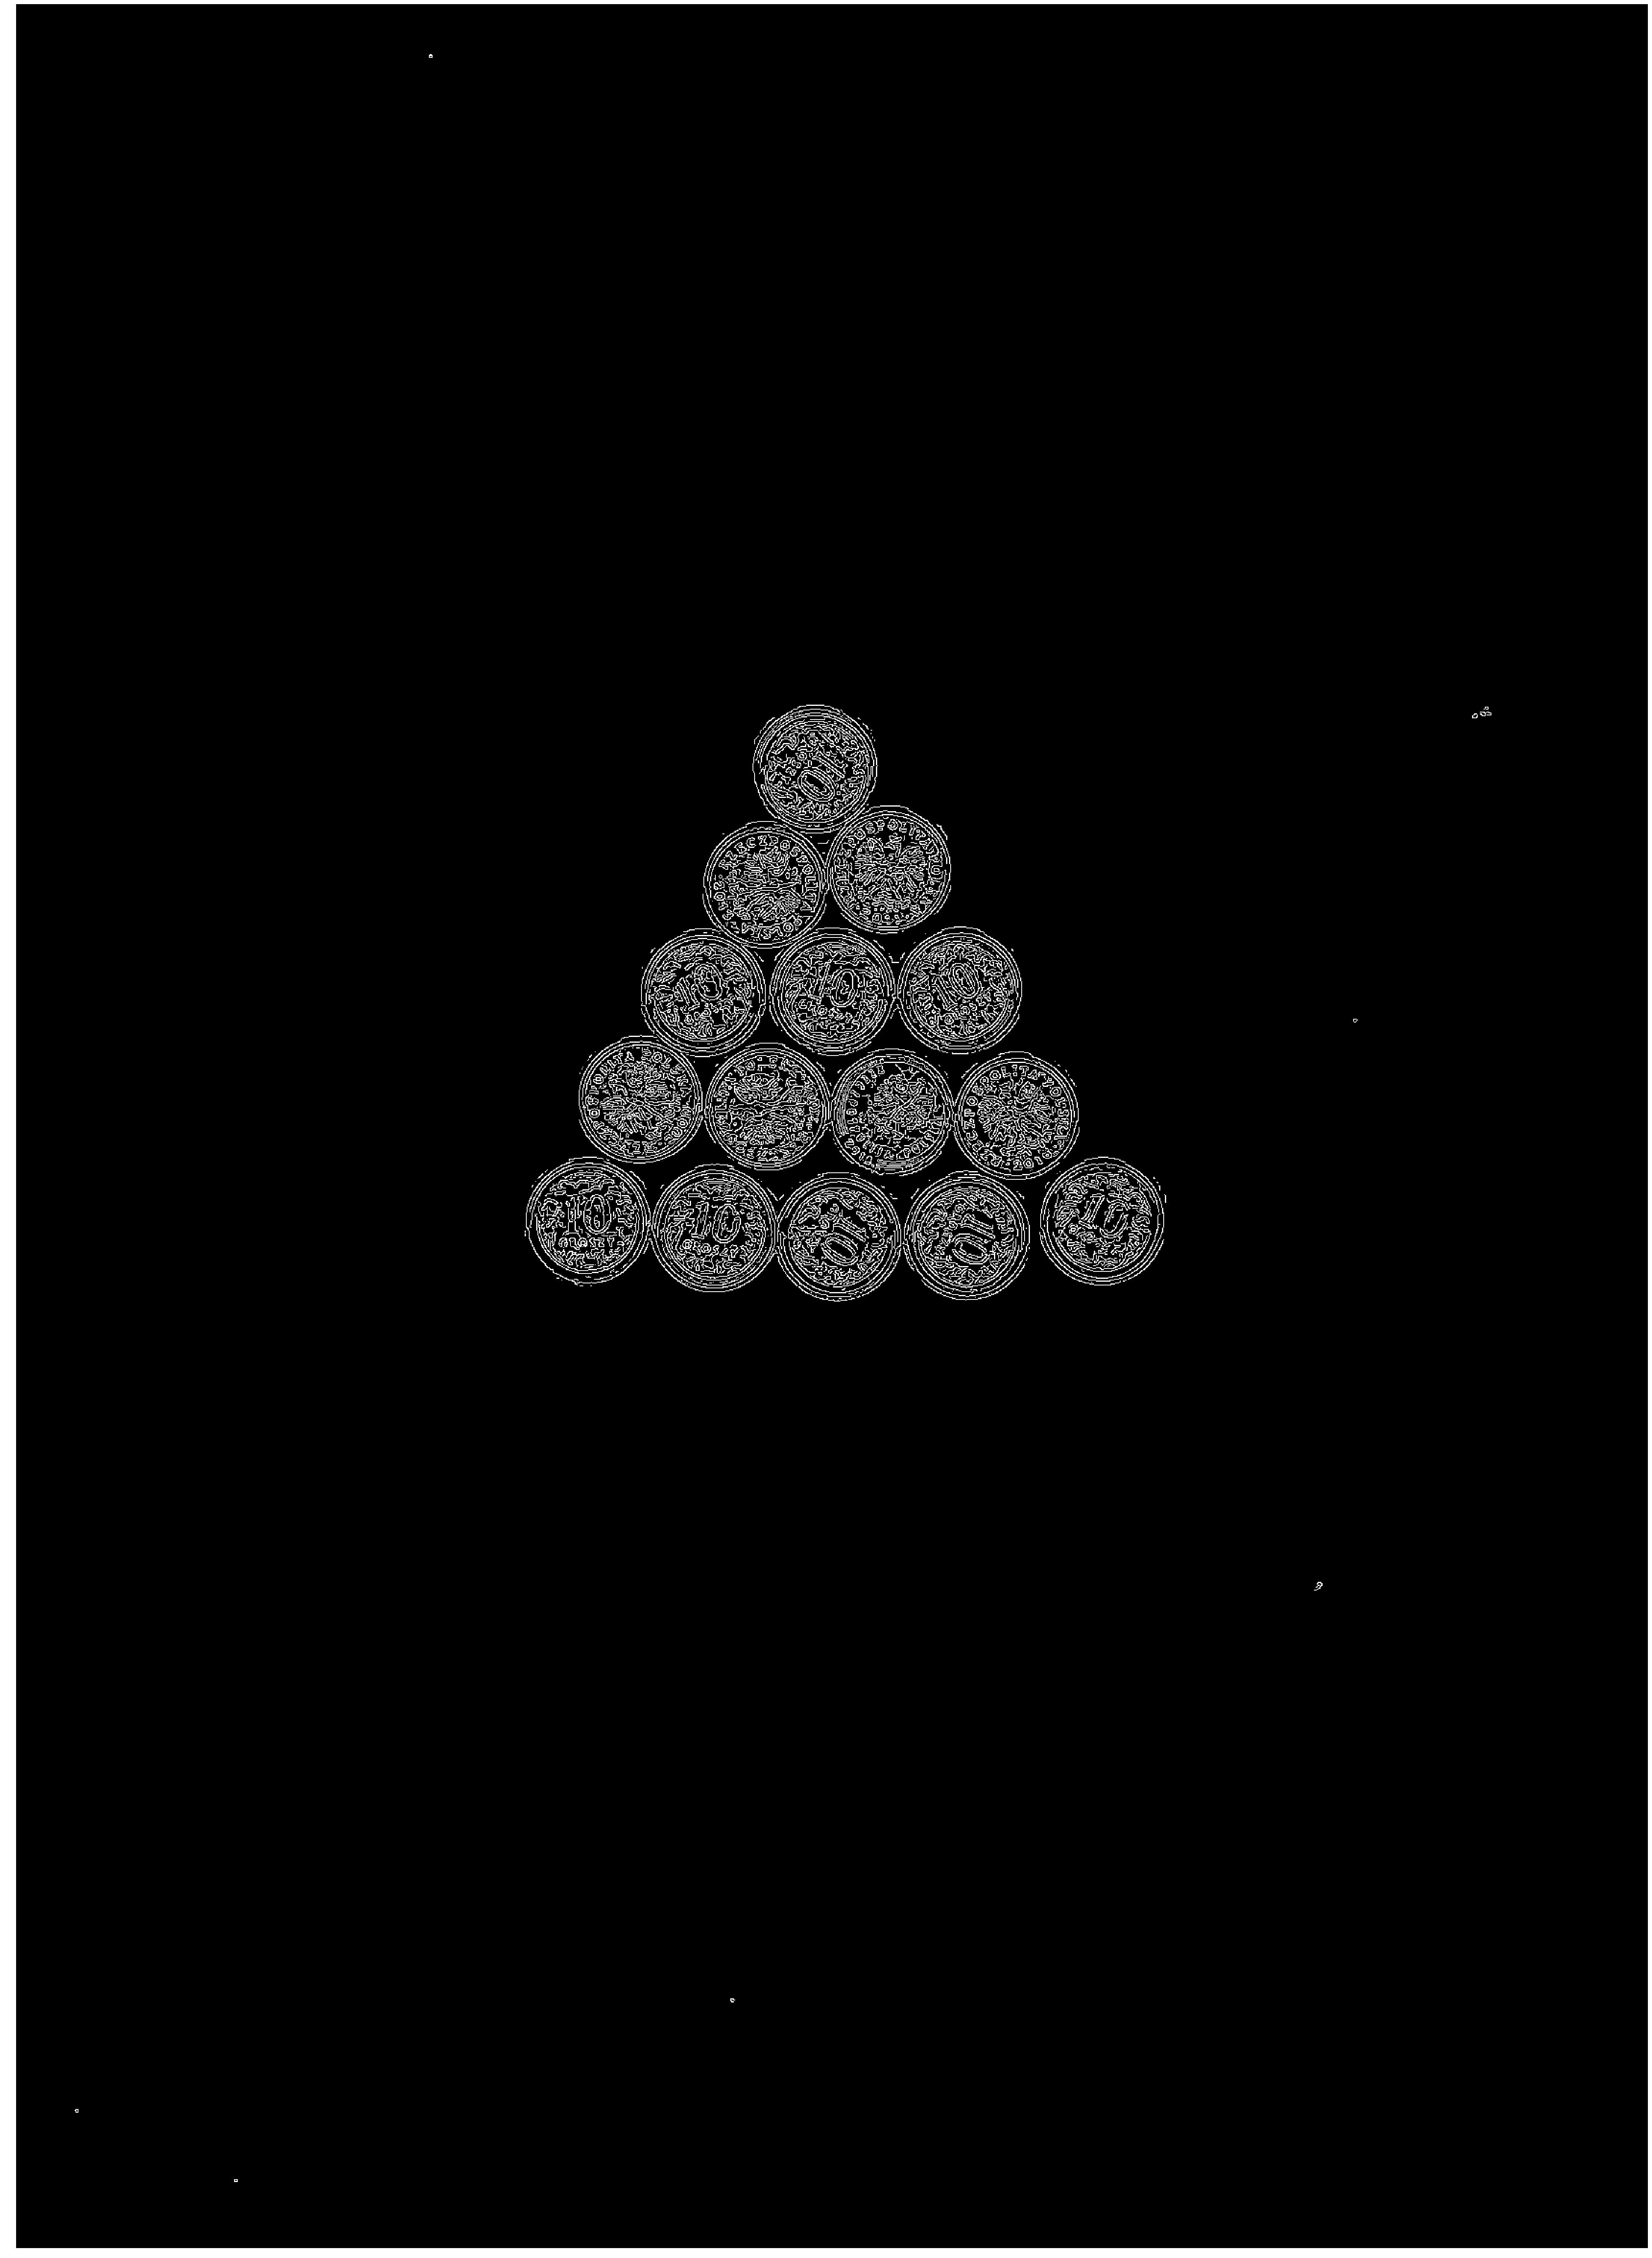

In [24]:
from skimage.feature import canny

edges = canny(byte_image)
from skimage.filters import sobel

elevation_map = sobel(byte_image)

showImage(elevation_map)
showImage(edges)

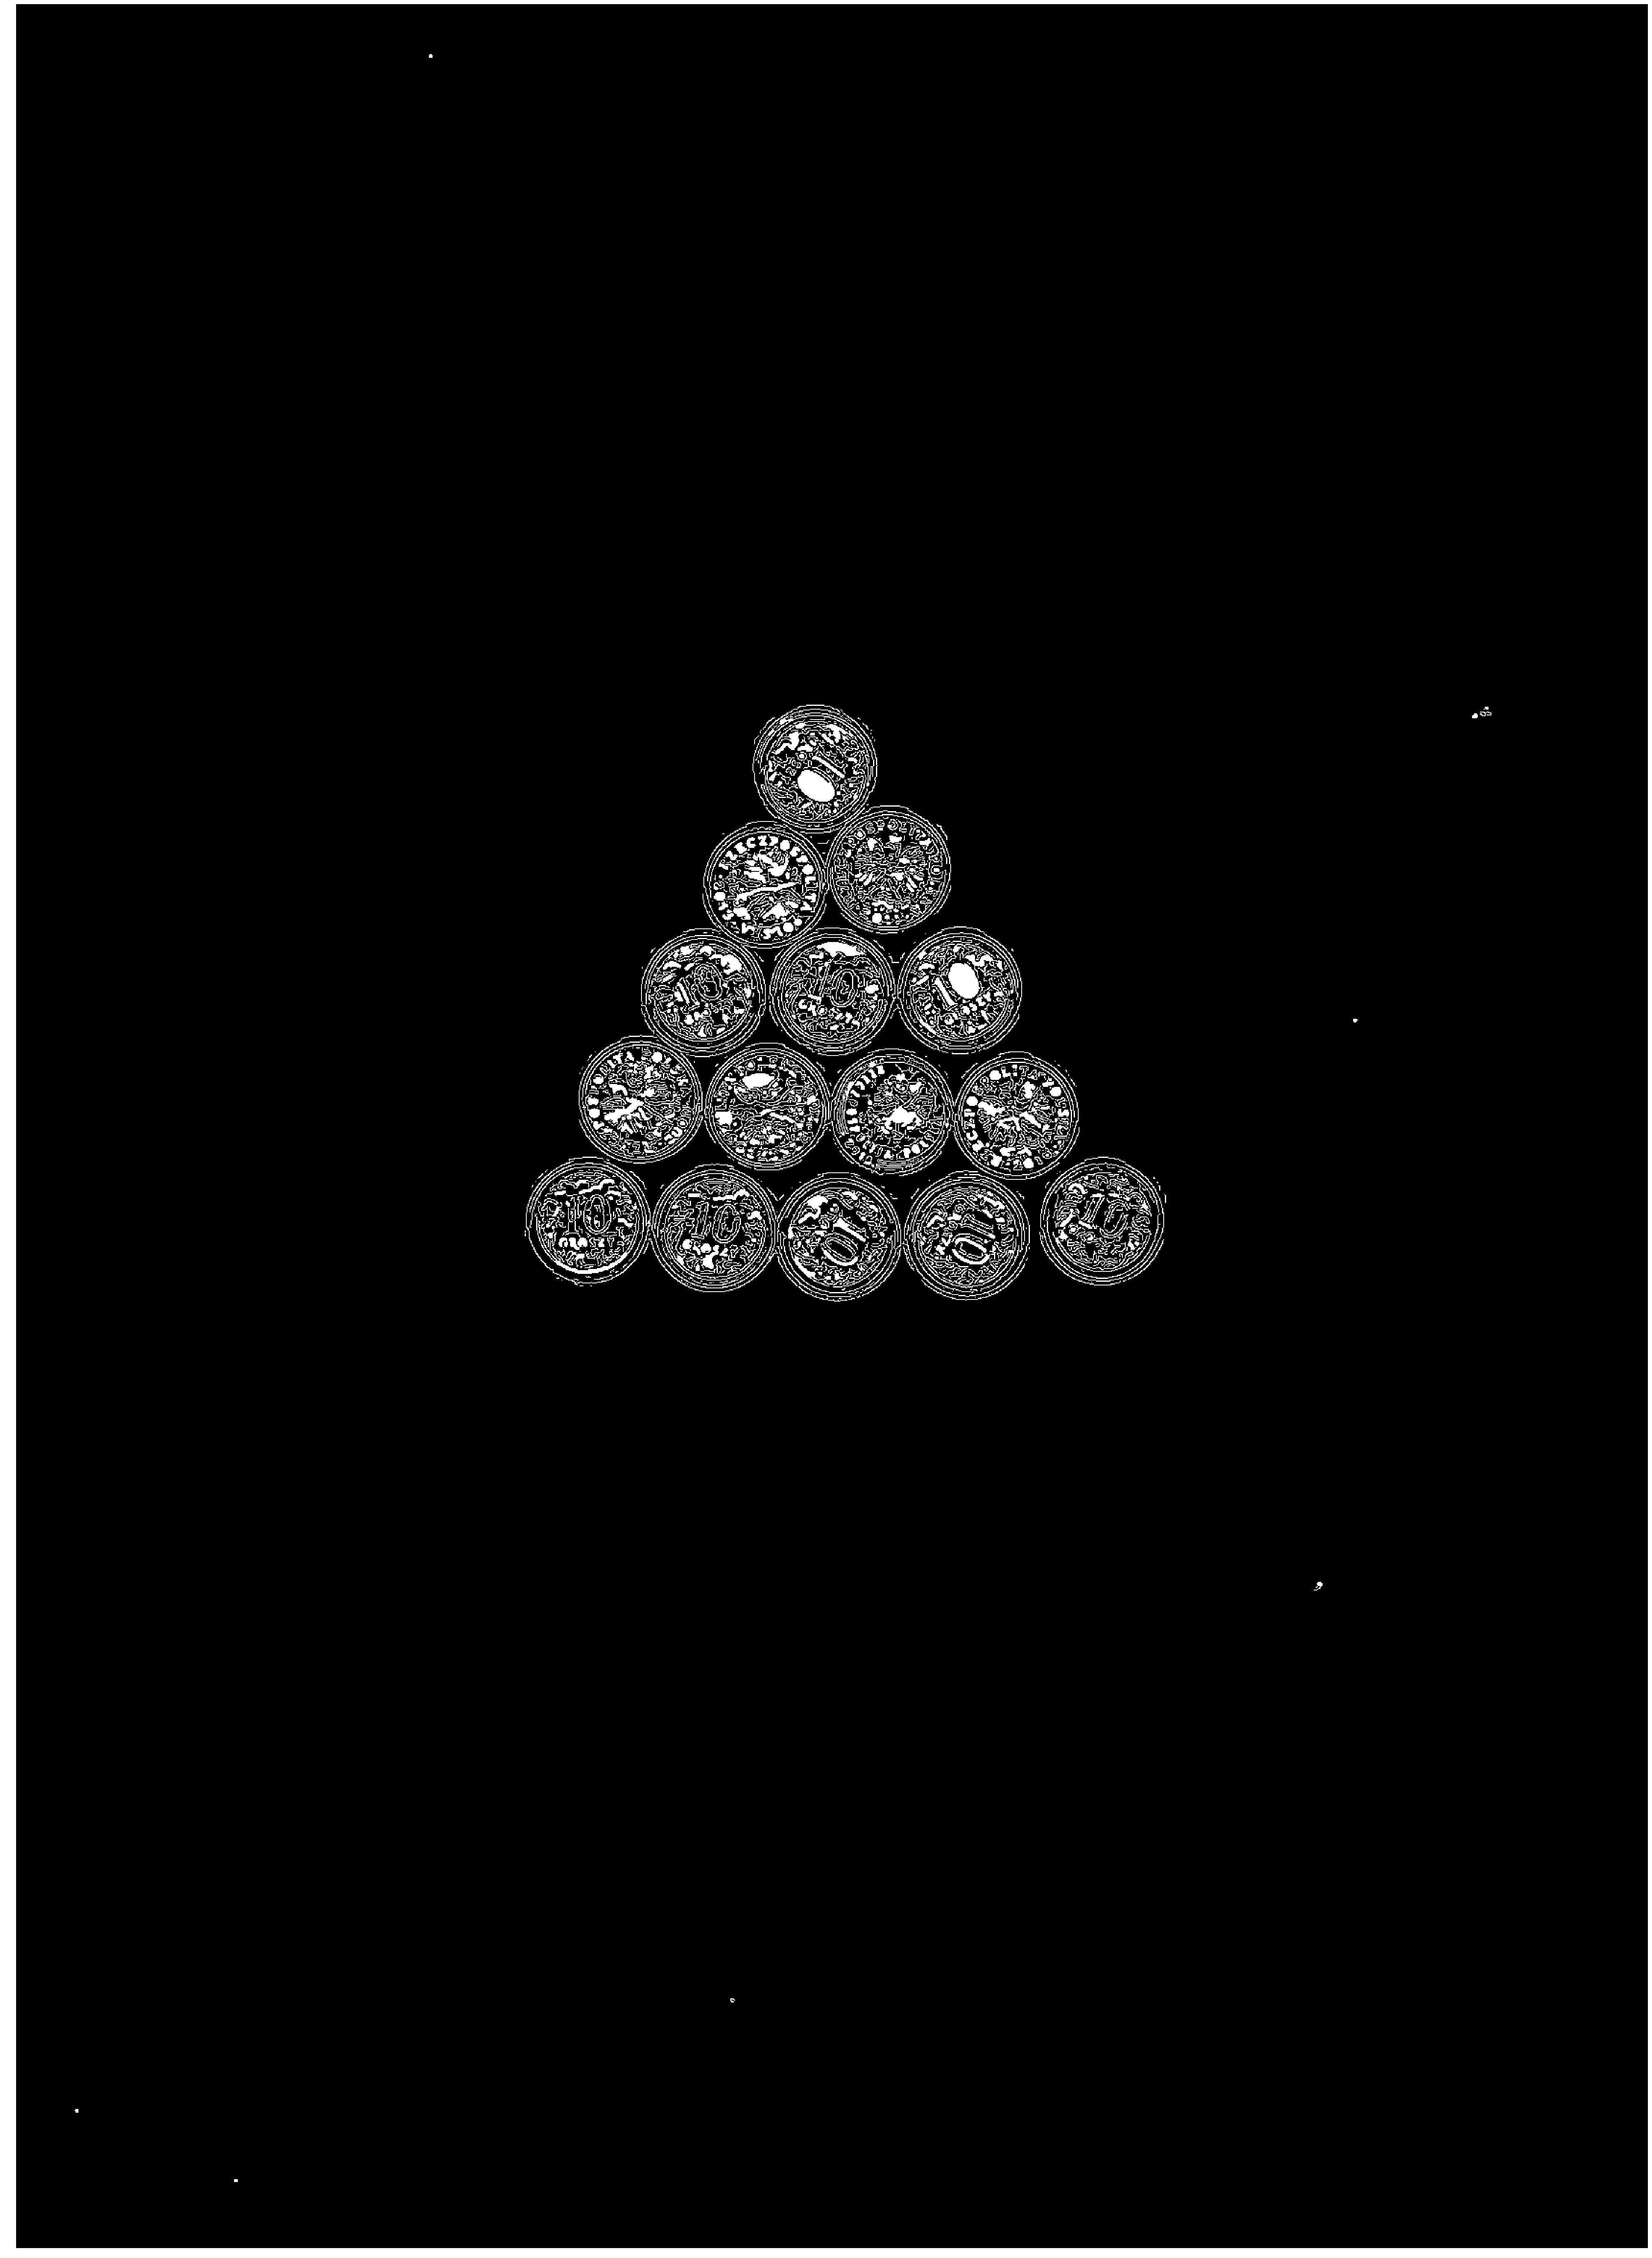

In [28]:
from scipy import ndimage as ndi

fill_coins = ndi.binary_fill_holes(edges)

showImage(fill_coins)

/anaconda3/lib/python3.7/site-packages/skimage/morphology/misc.py:203: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  "Did you mean to use a boolean array?", UserWarning)


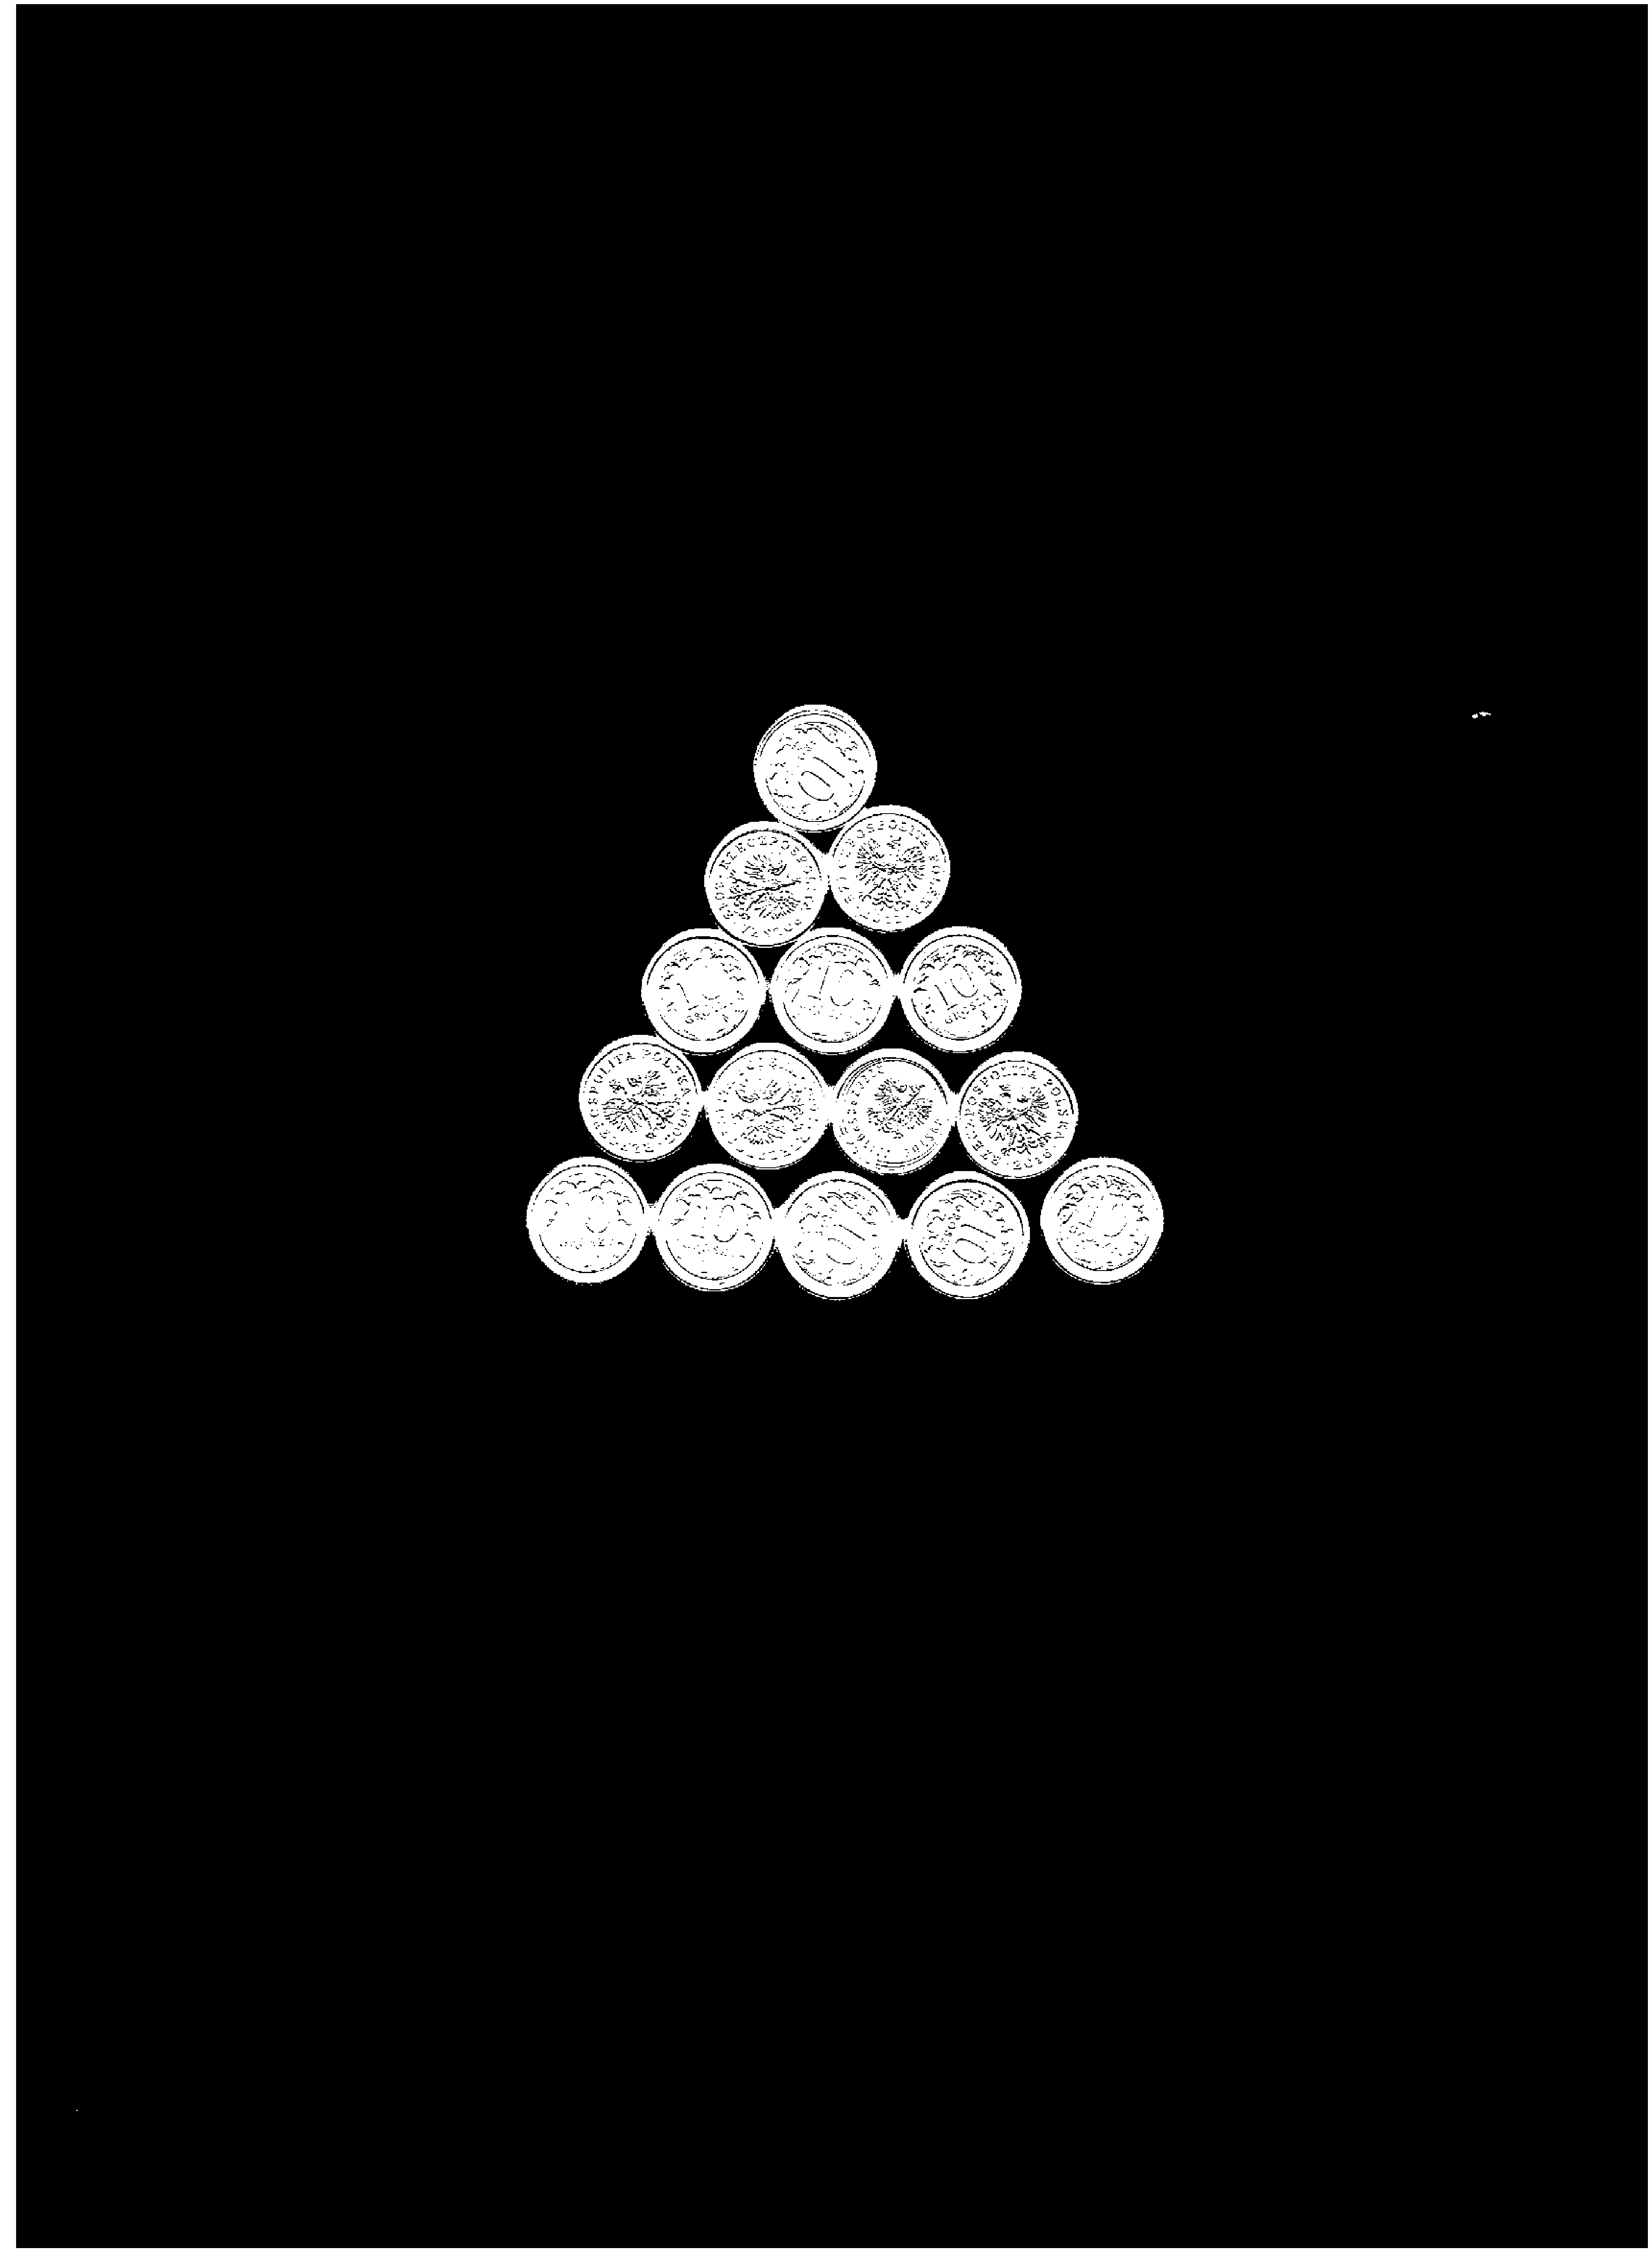

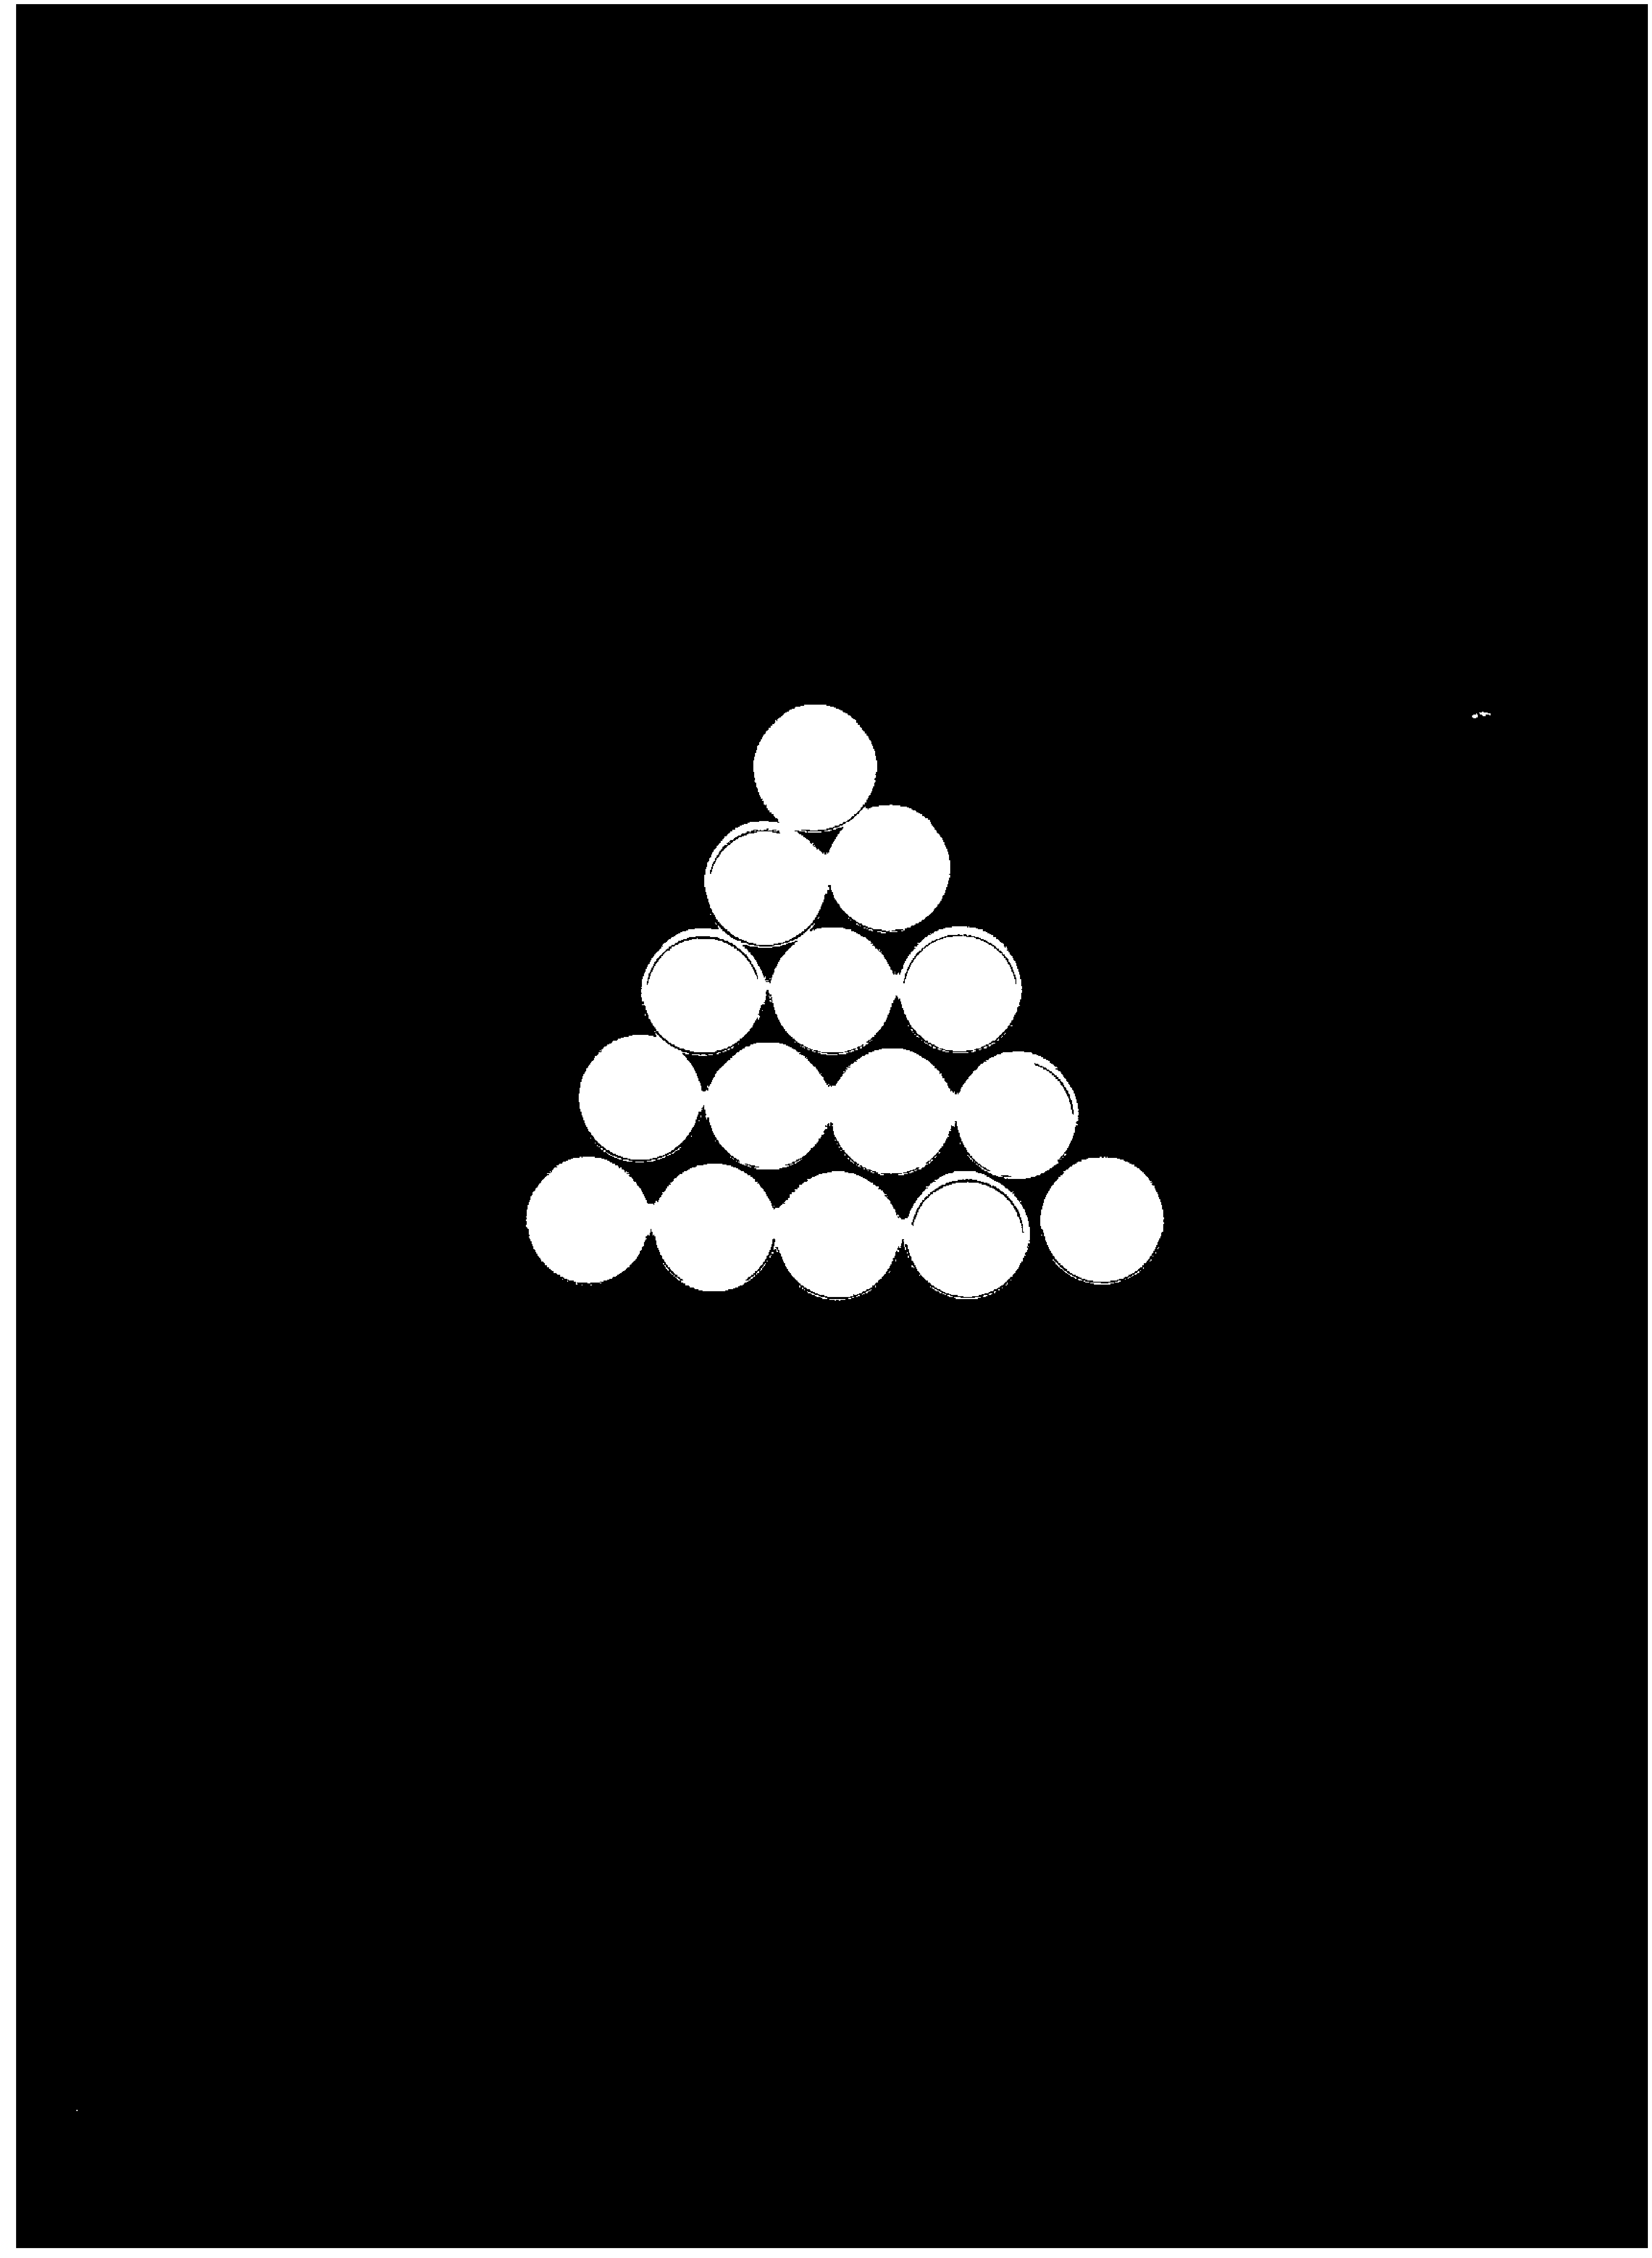

In [31]:
from skimage import morphology

coins_cleaned = morphology.remove_small_objects(image_byte, 64)
coins_cleaned_holes = morphology.remove_small_holes(coins_cleaned, 128)


showImage(coins_cleaned)
showImage(coins_cleaned_holes)


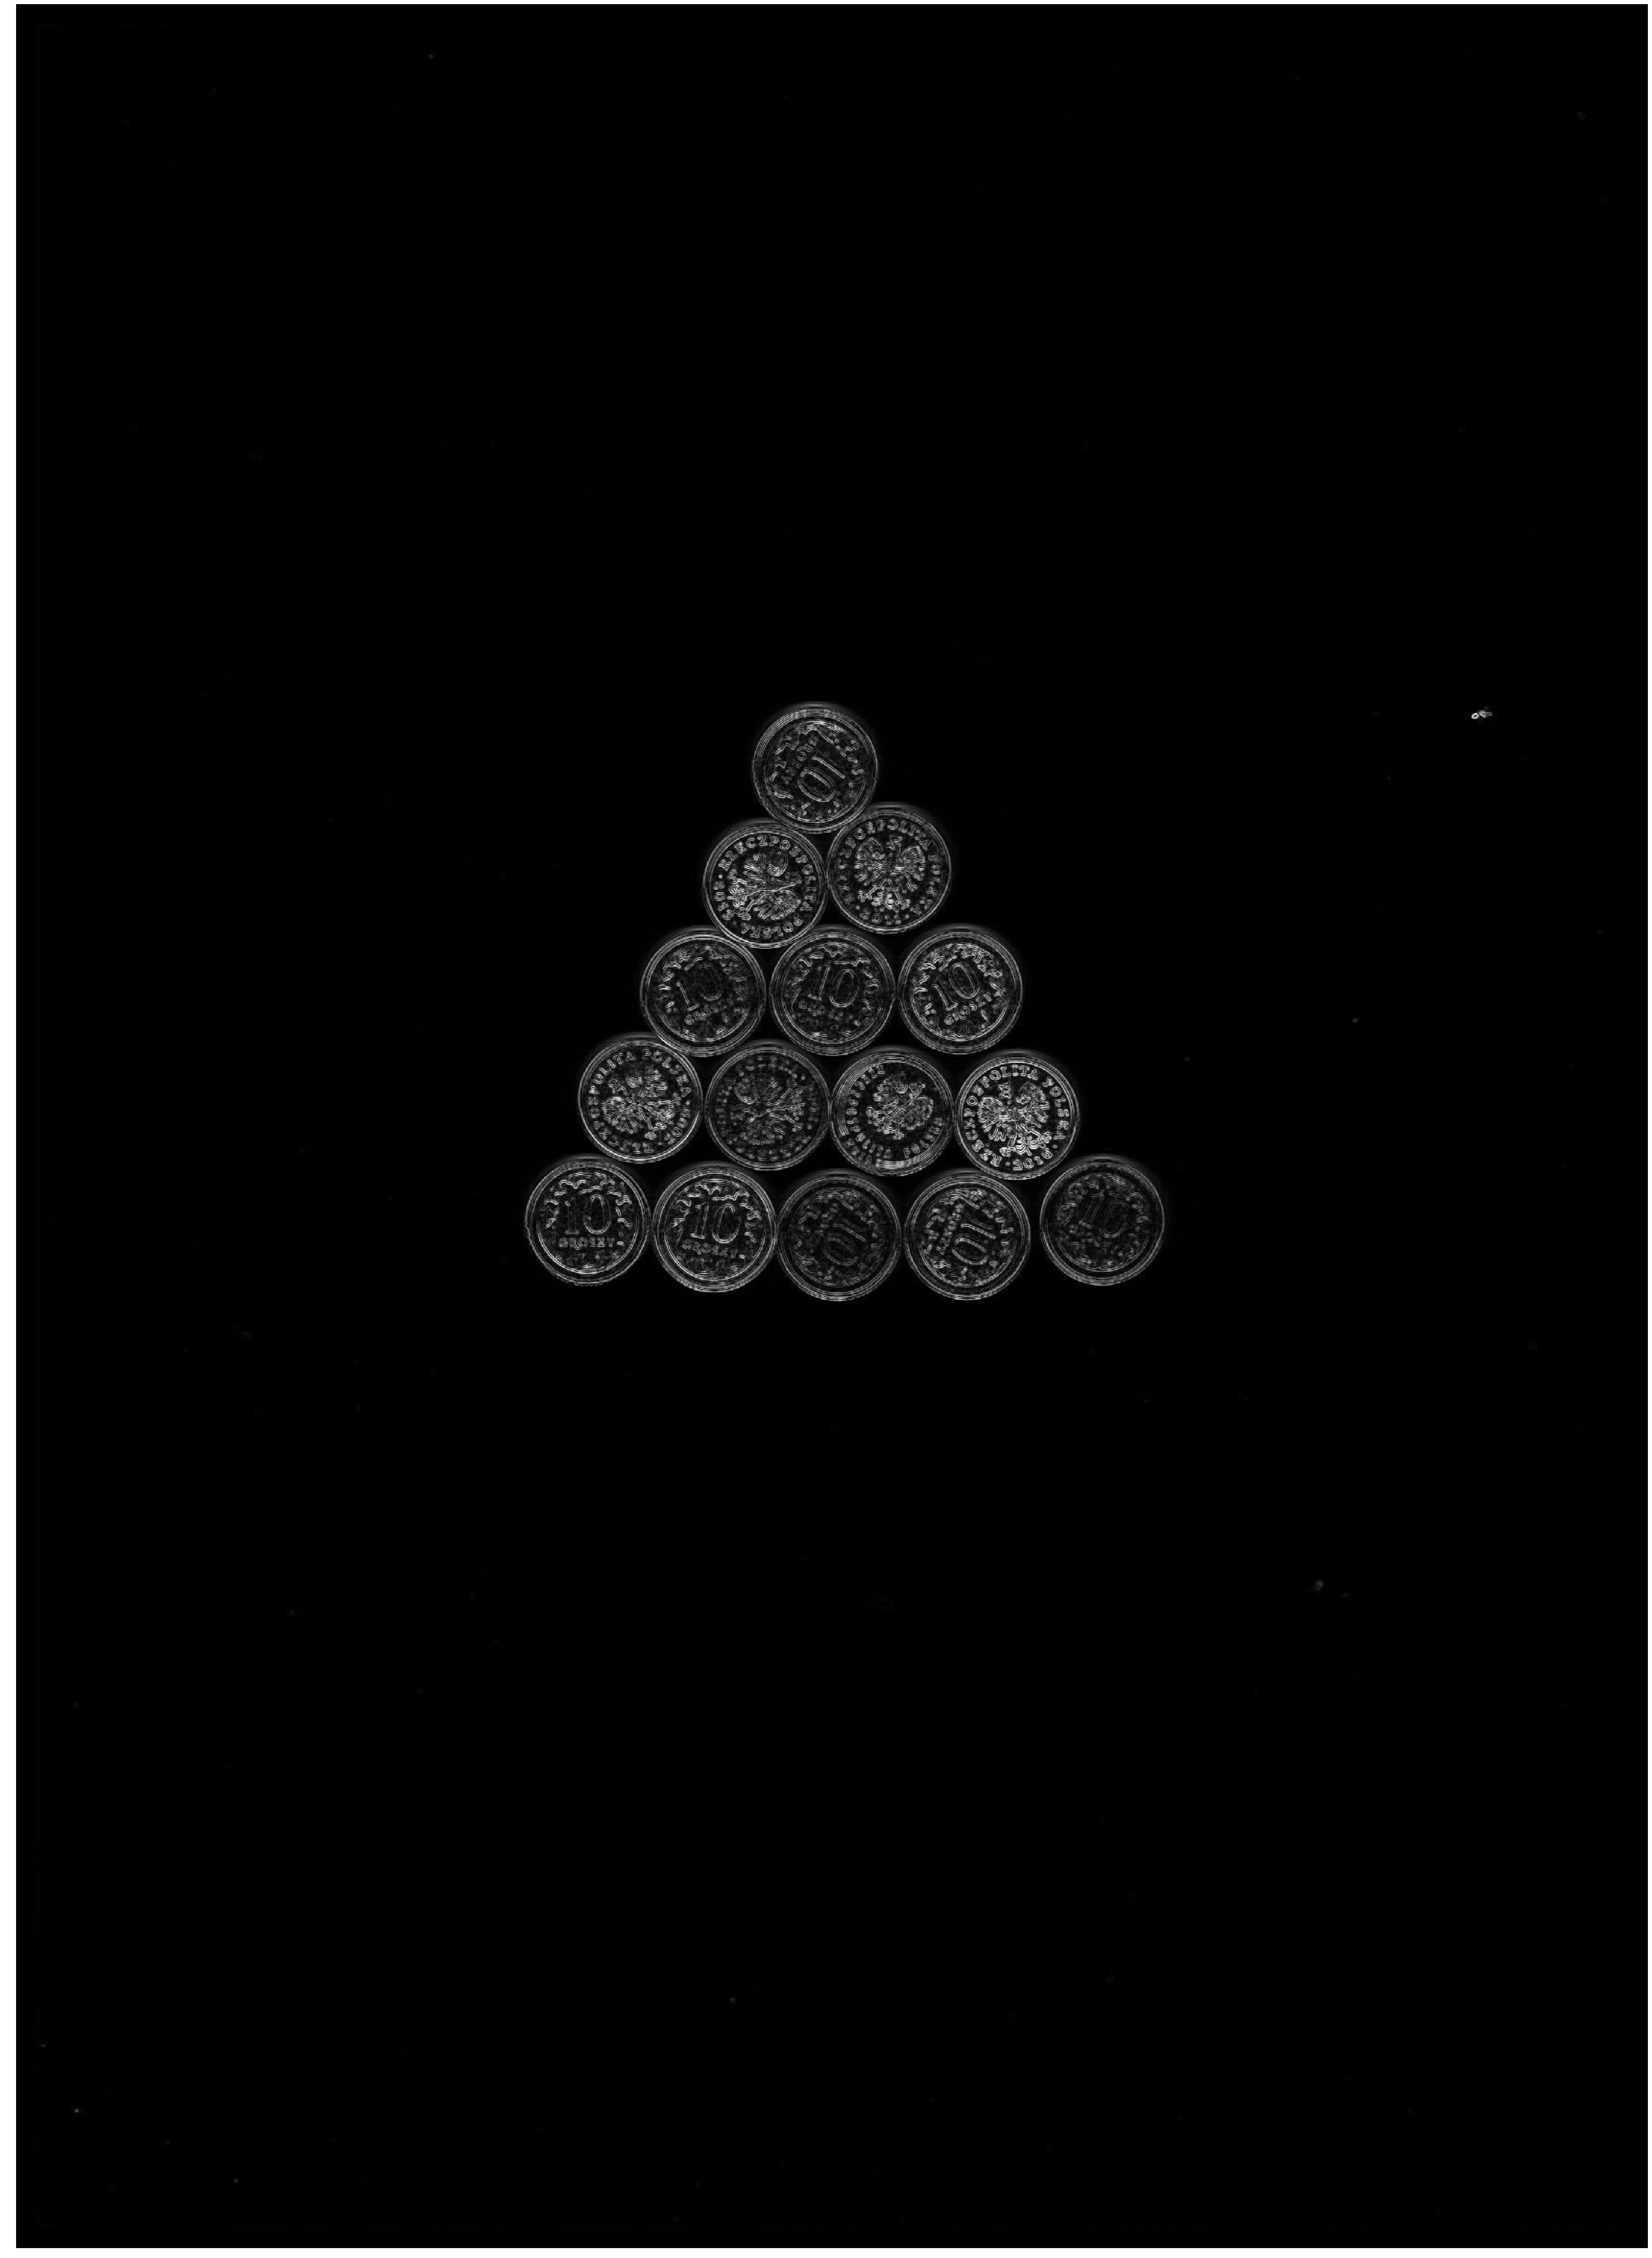

In [14]:
from skimage.filters import sobel

elevation_map = sobel(gray_image)

showImage(elevation_map)

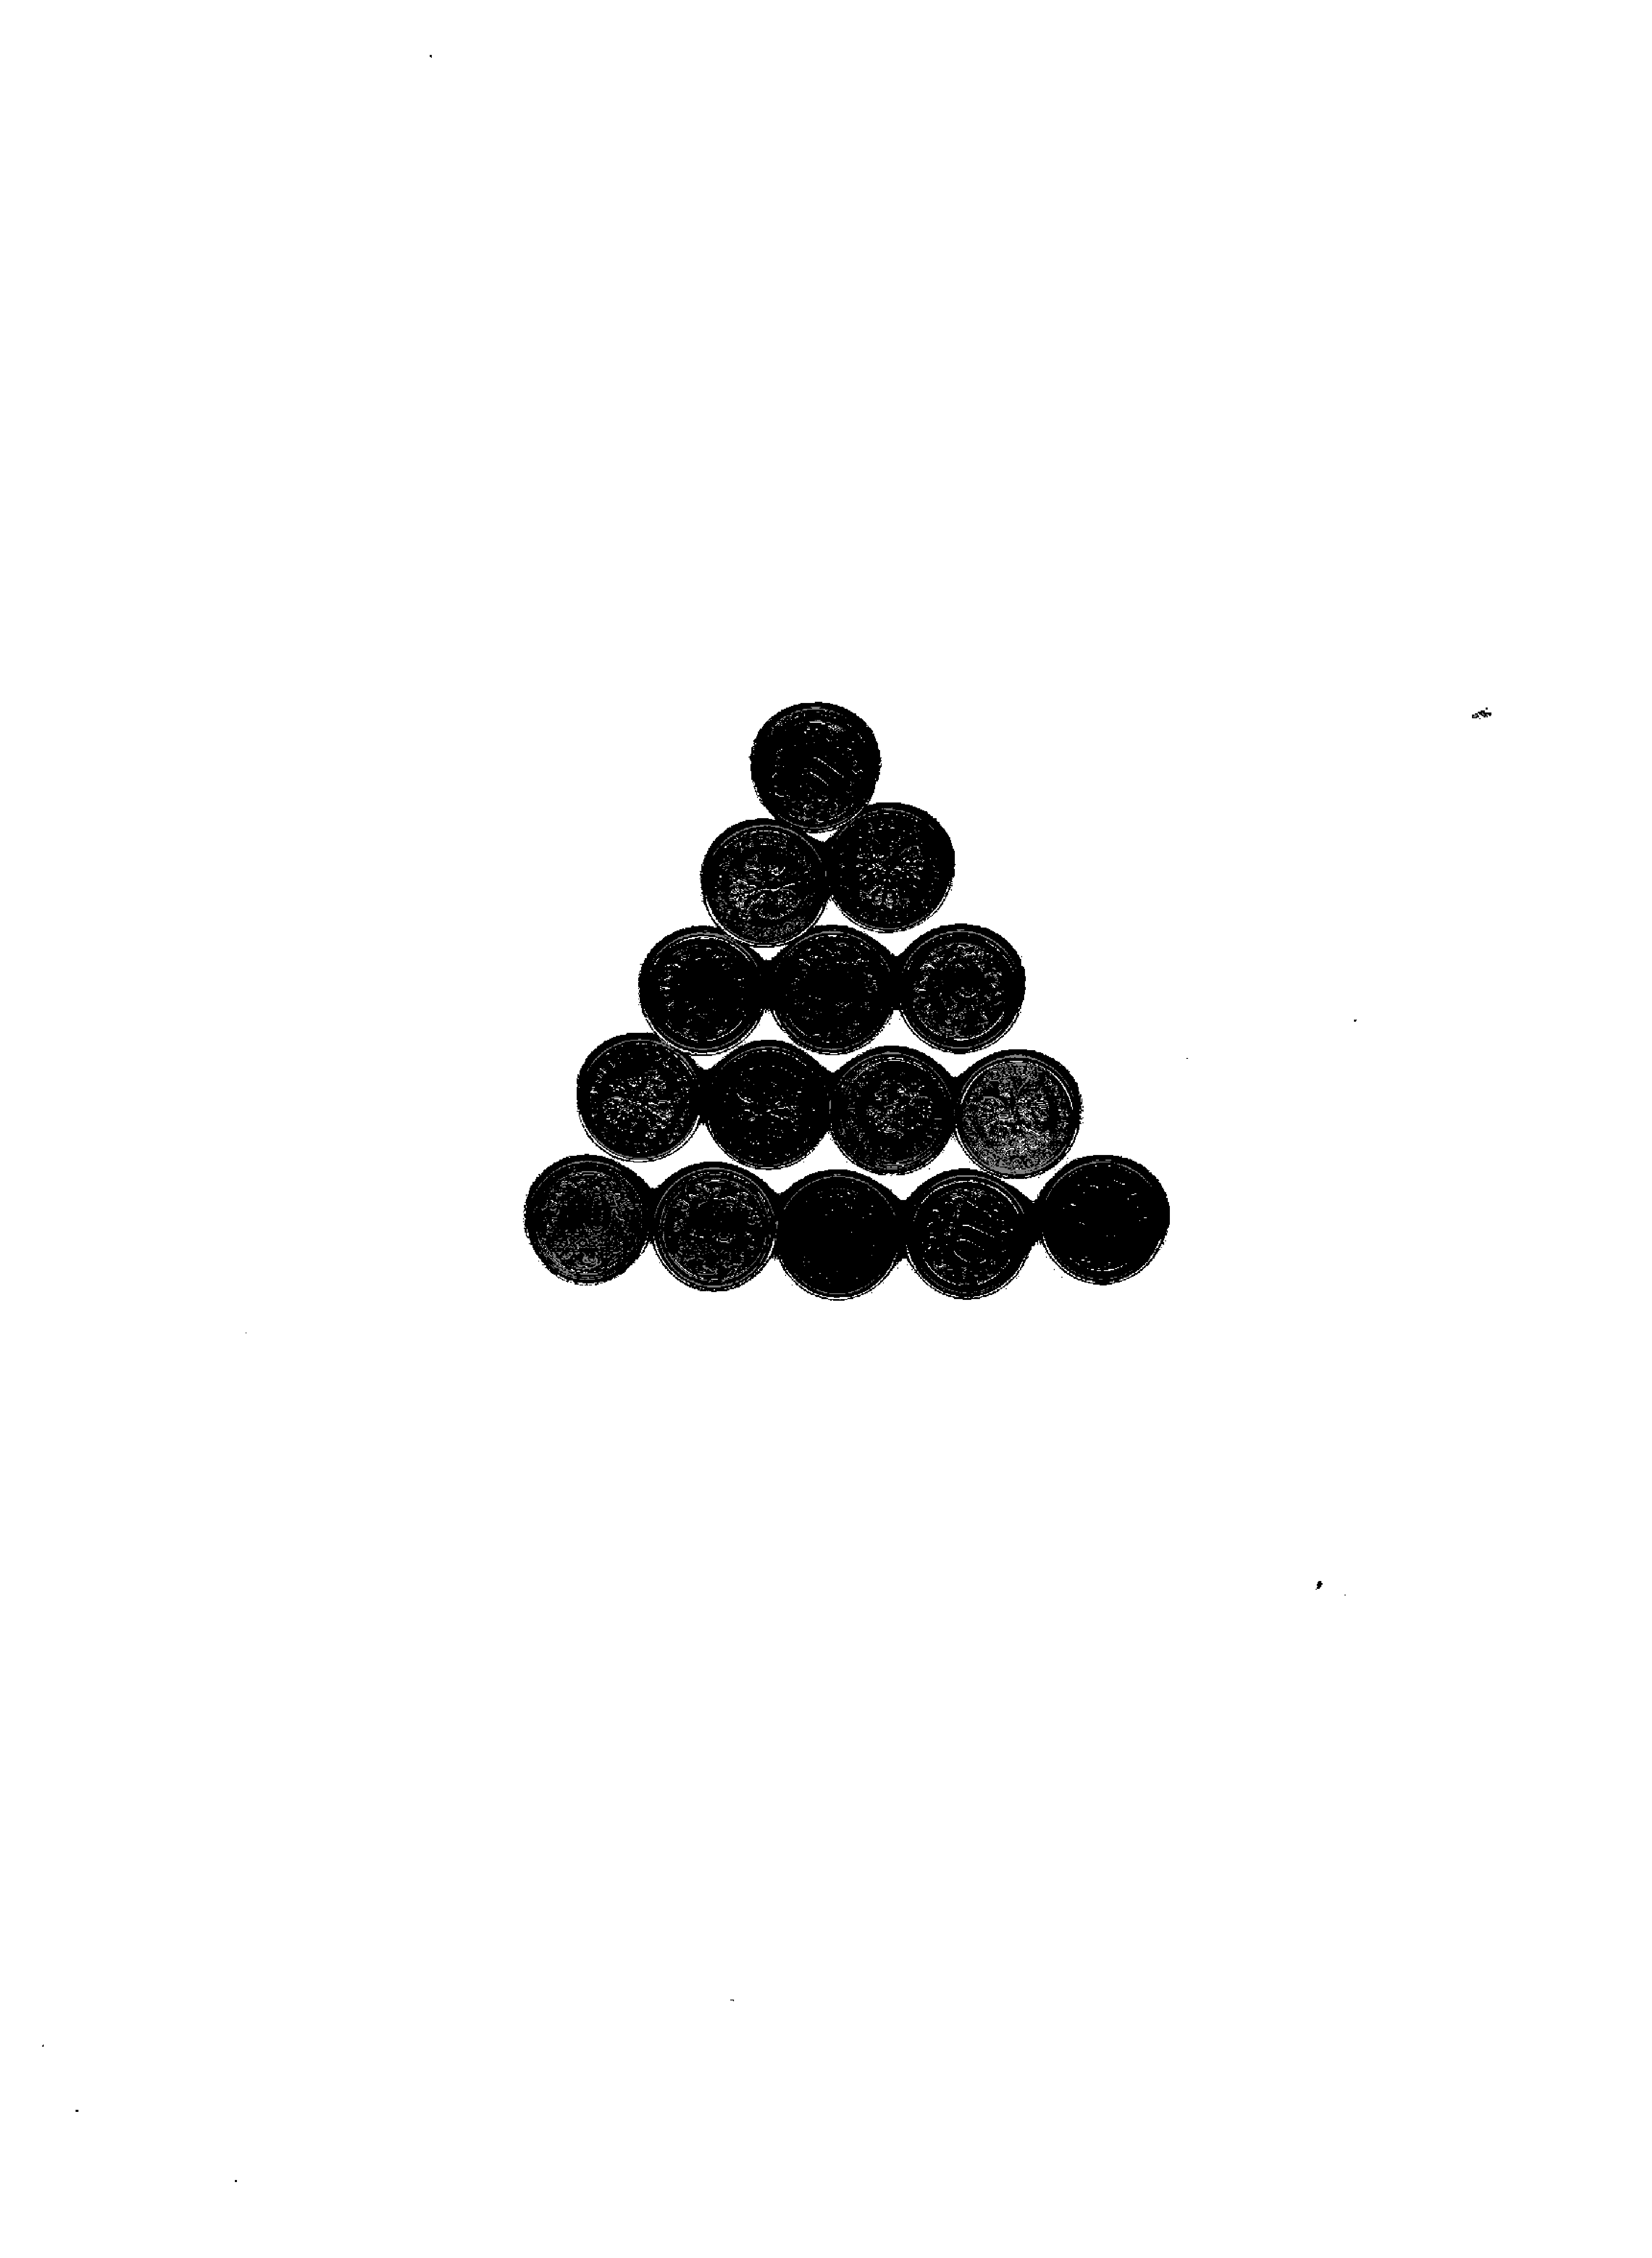

In [15]:
markers = np.zeros_like(gray_image)
markers[byte_image < 50] = 1
markers[byte_image > 230] = 2

showImage(markers)

/anaconda3/lib/python3.7/site-packages/skimage/util/arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


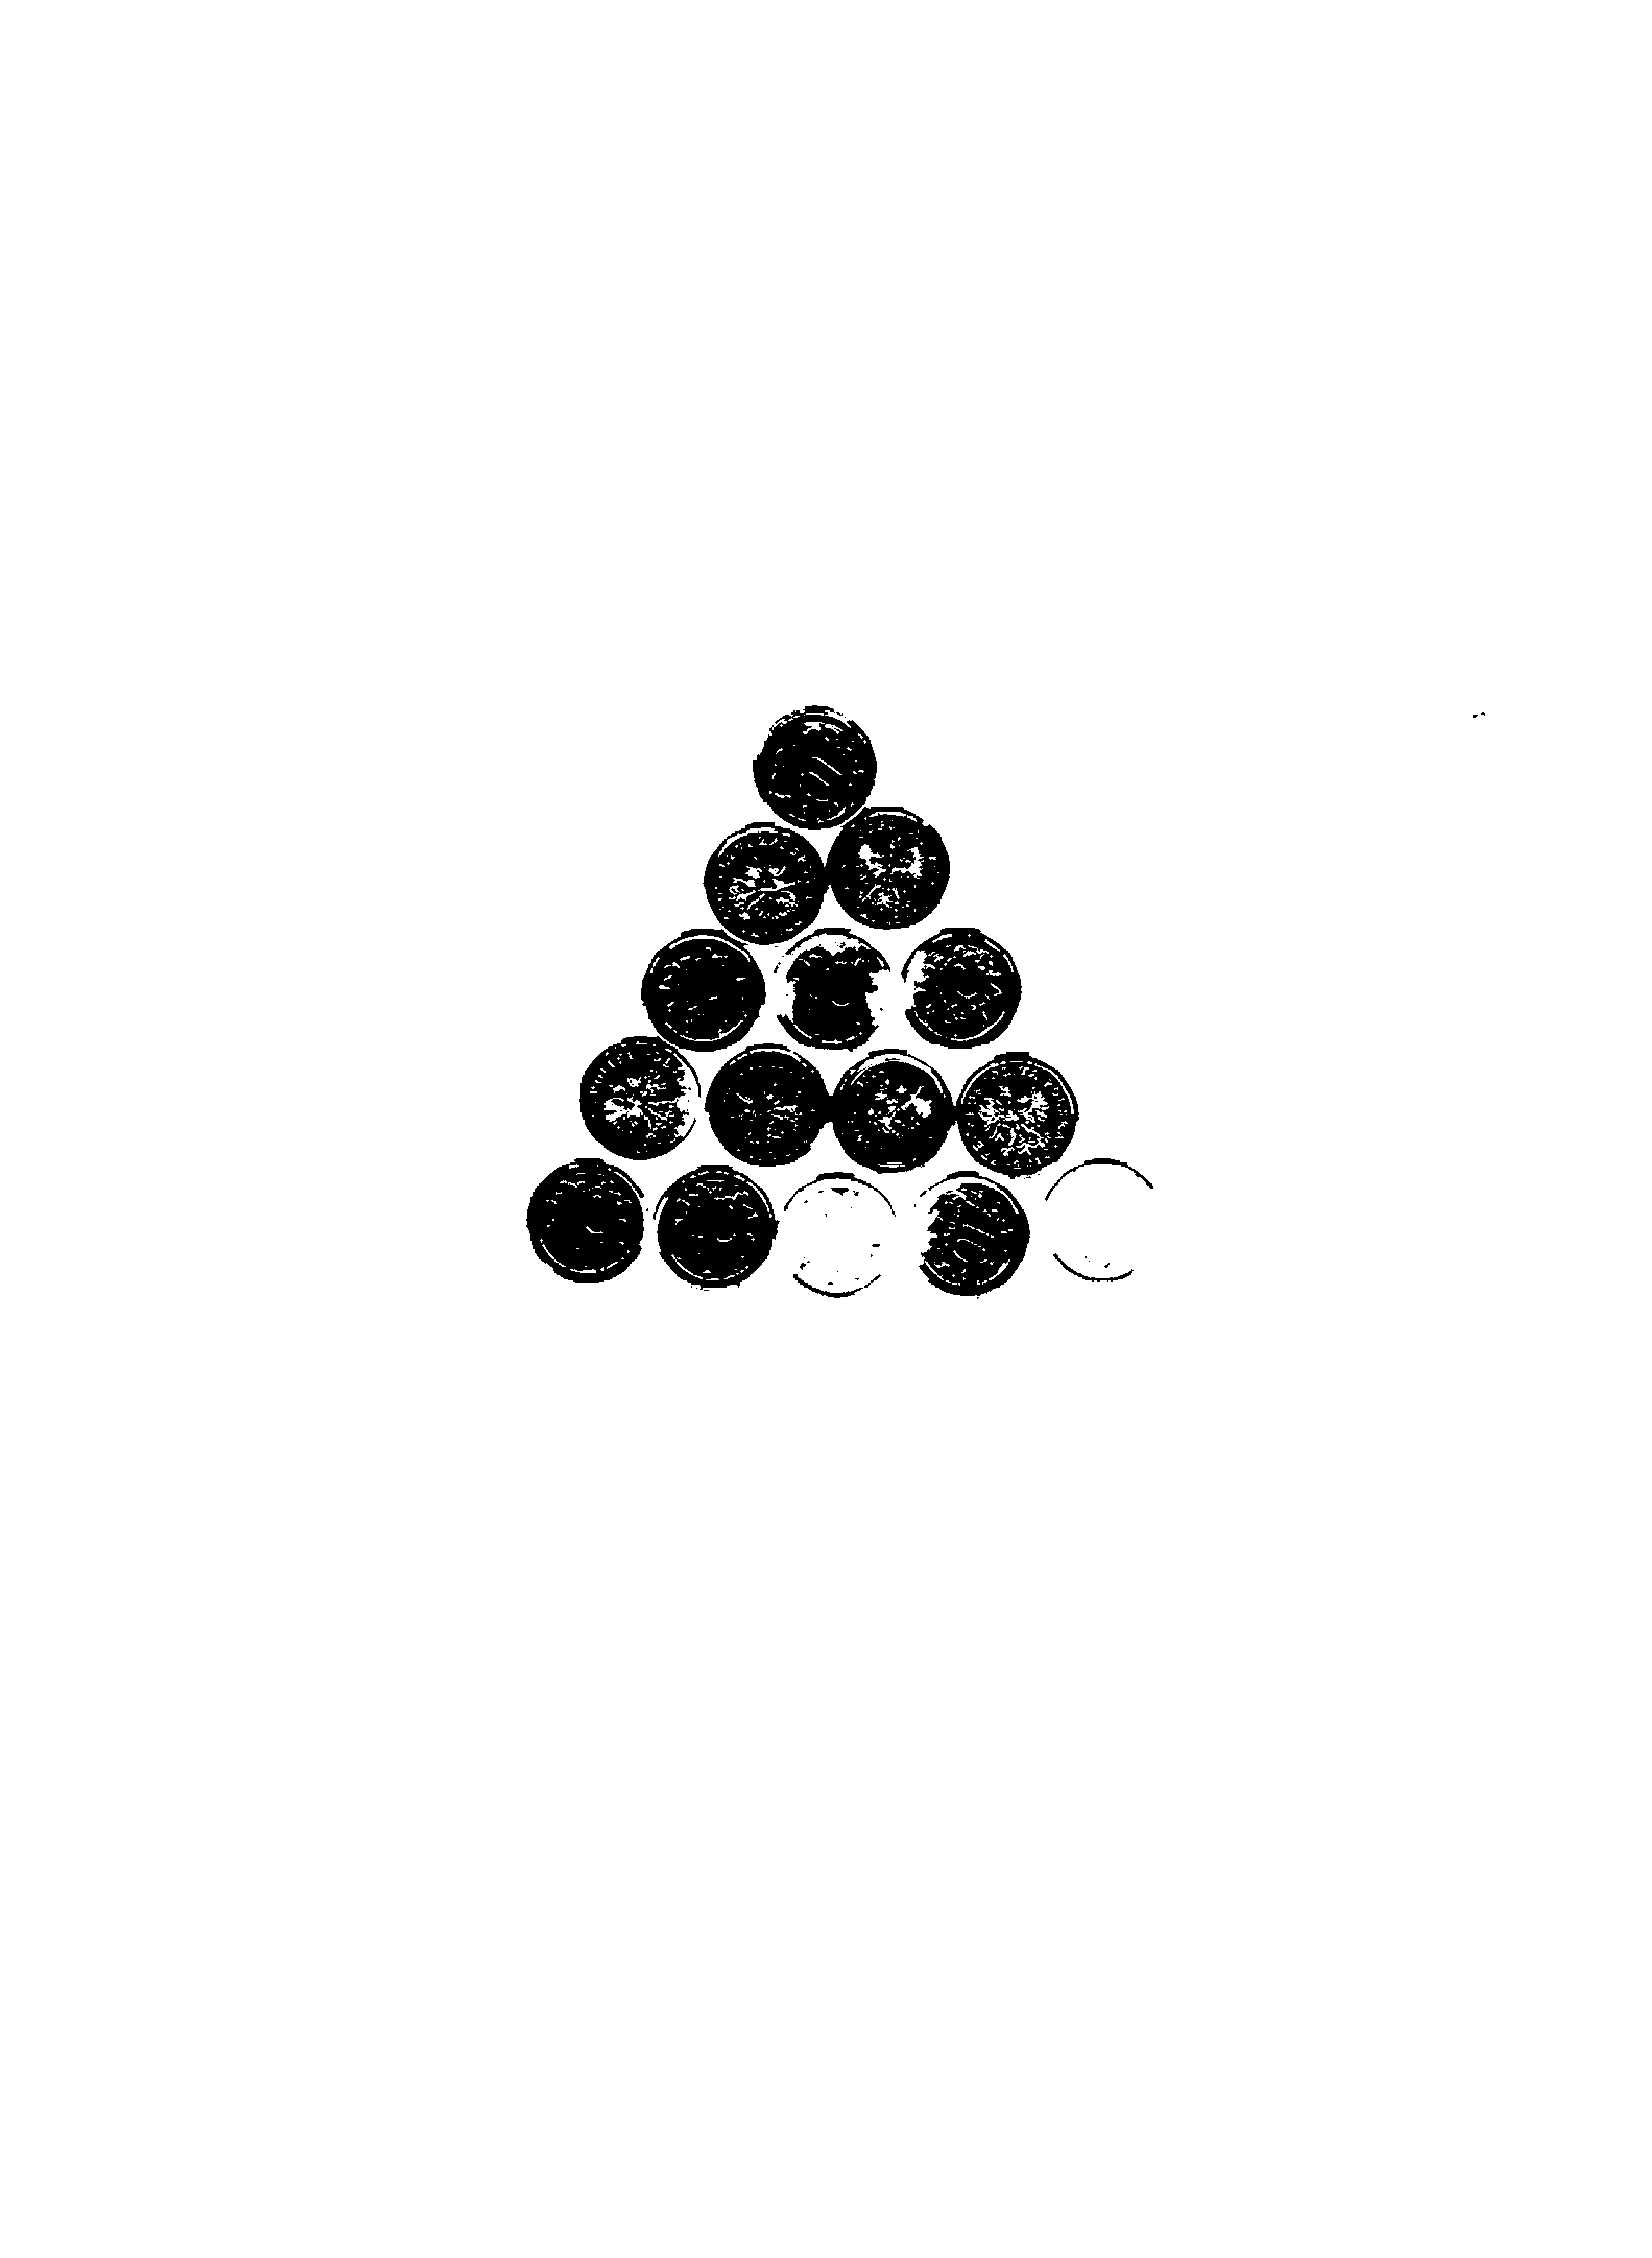

In [16]:
segmentation = morphology.watershed(elevation_map, markers)

showImage(segmentation)

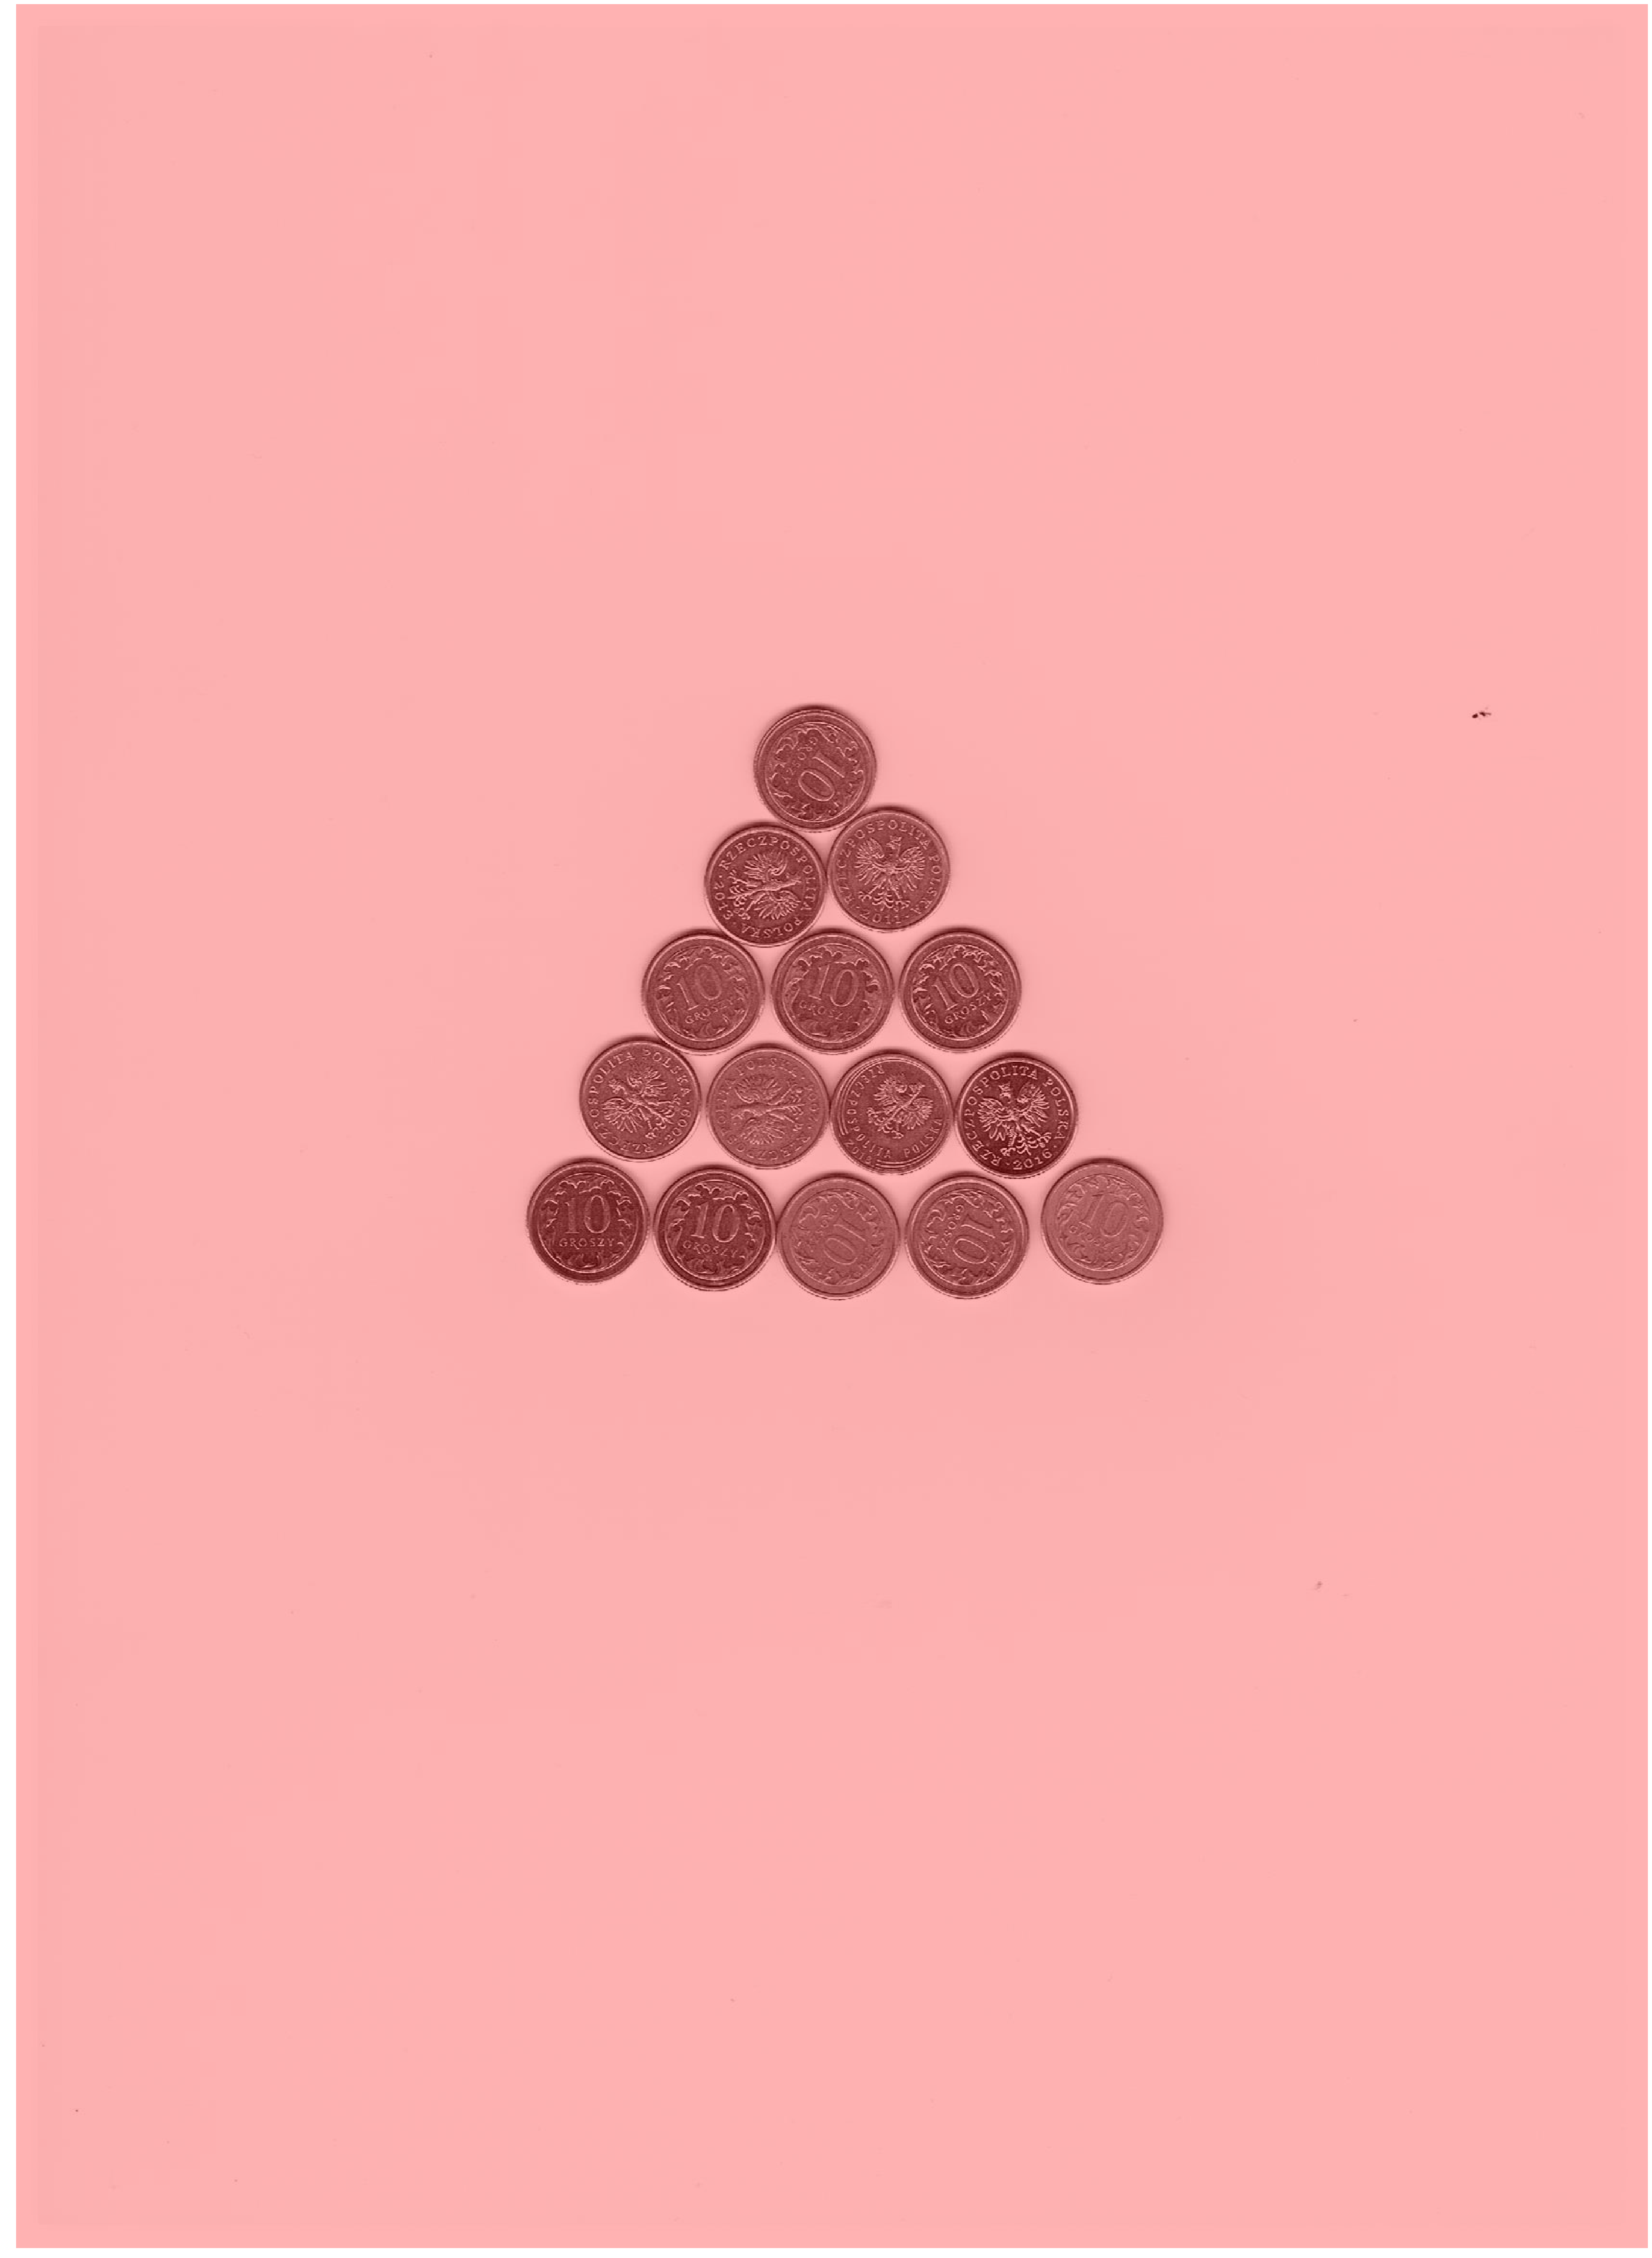

In [17]:
from skimage.color import label2rgb

segmentation = ndi.binary_fill_holes(segmentation - 1)
labeled_coins, _ = ndi.label(segmentation)
image_label_overlay = label2rgb(labeled_coins, image=image)

showImage(image_label_overlay)


/anaconda3/lib/python3.7/site-packages/skimage/util/arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)
/anaconda3/lib/python3.7/site-packages/skimage/segmentation/slic_superpixels.py:156: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_z = grid_z[slices]
/anaconda3/lib/python3.7/site-packages/skimage/segmentation/slic_superpixels.py:157: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]

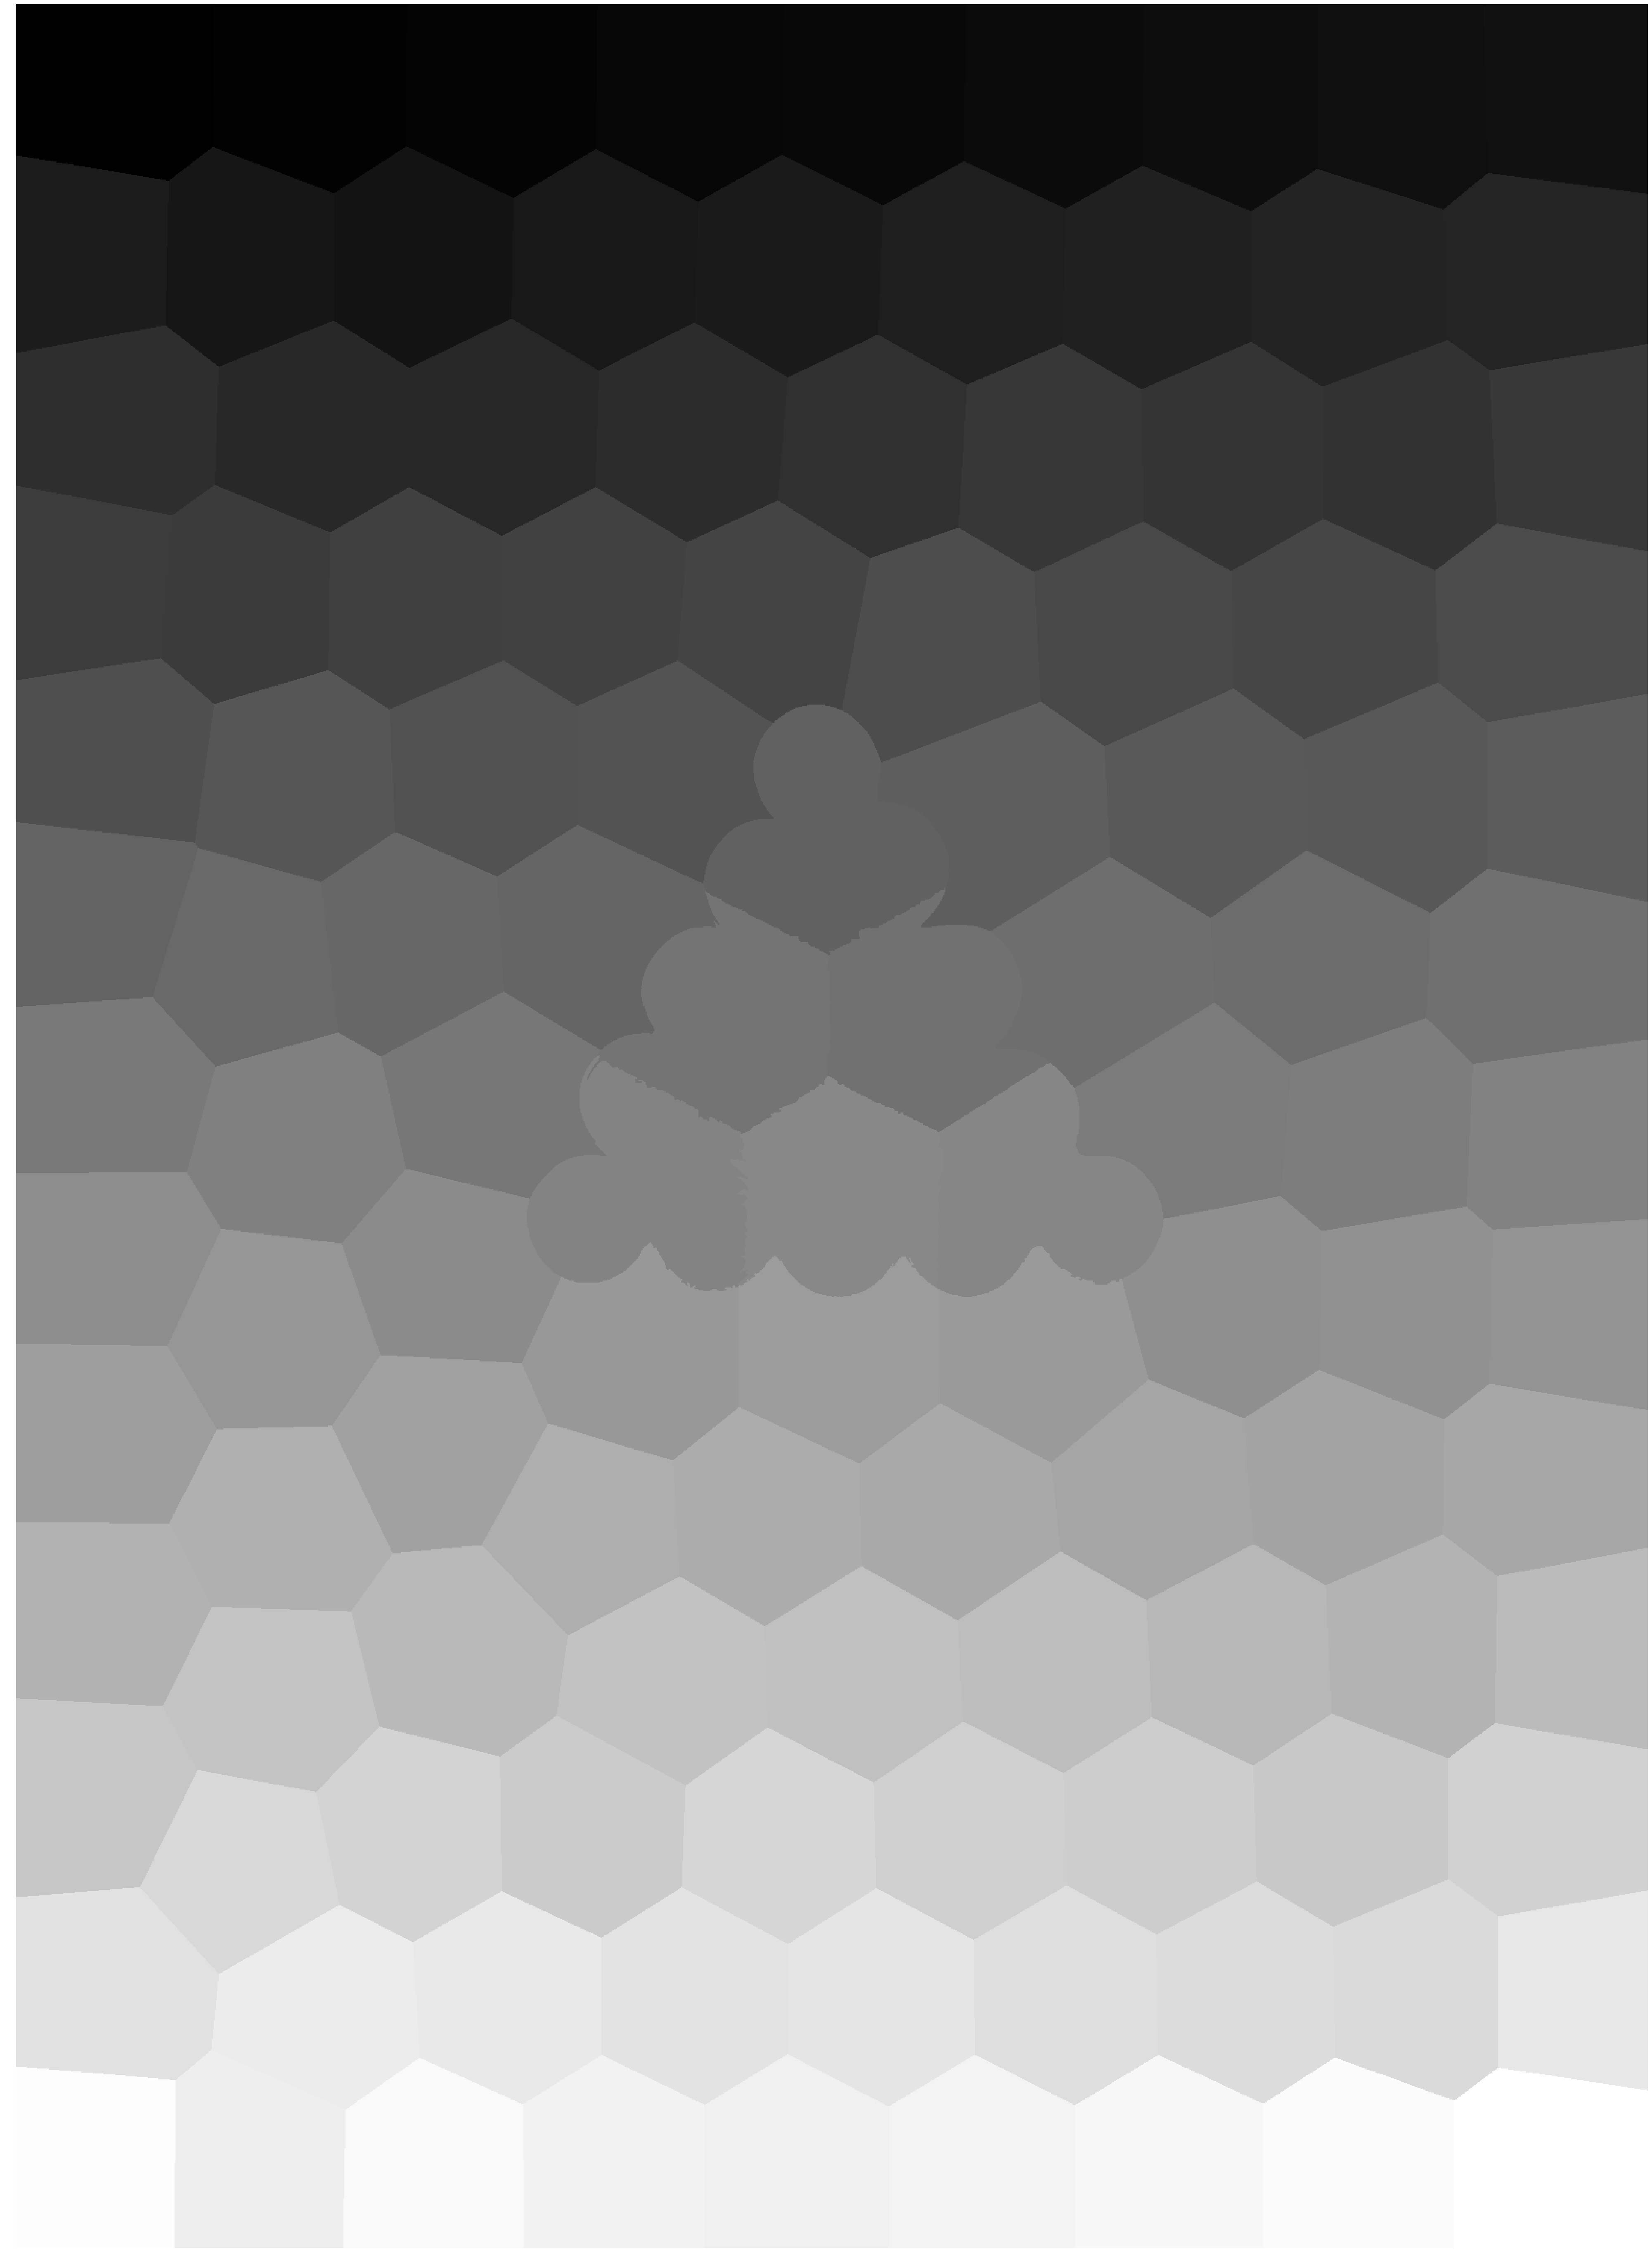

In [20]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.filters import sobel
from skimage.measure import label
from skimage.segmentation import slic, join_segmentations
from skimage.morphology import watershed
from skimage.color import label2rgb
from skimage import data

coins = byte_image

# Make segmentation using edge-detection and watershed.
edges = sobel(coins)

# Identify some background and foreground pixels from the intensity values.
# These pixels are used as seeds for watershed.
markers = np.zeros_like(coins)
foreground, background = 1, 2
markers[coins < 30.0] = background
markers[coins > 150.0] = foreground

ws = watershed(edges, markers)
seg1 = label(ws == foreground)

# Make segmentation using SLIC superpixels.
seg2 = slic(coins, n_segments=117, max_iter=160, sigma=1, compactness=0.75,
            multichannel=False)

# Combine the two.
segj = join_segmentations(seg1, seg2)
showImage(seg2)
